In [1]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_el = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df_gl = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df_gr = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
era_el = pd.read_csv('./extracted/East_lansing/East_Lansing_9km.csv')
era_gl = pd.read_csv('./extracted/Gaylord/Gaylord_9km.csv')
era_gr = pd.read_csv('./extracted/GRR/GRR_9km.csv')

df_gl = df_gl.drop(df_gl.index[-1])
era_gl = era_gl.drop(era_gl.index[:-98905])
df_gl = df_gl.reset_index(drop=True)
era_gl = era_gl.reset_index(drop=True)
era_gr = era_gr.drop(era_gr.index[157751:])


In [9]:
df_el_m = ((df_el.isnull() | df_el.isna()).sum() * 100 / df_el.index.size).round(2)
df_gl_m = ((df_gl.isnull() | df_gl.isna()).sum() * 100 / df_gl.index.size).round(2)
df_gr_m = ((df_gr.isnull() | df_gr.isna()).sum() * 100 / df_gr.index.size).round(2)

In [19]:
df_m = pd.DataFrame({'Station':['East Lansing', 'Gaylord', 'Grand Rapids'], '%T missing':[df_el_m.atmp, df_gl_m.atmp, df_gr_m.atmp],
        '%RH misssing':[df_el_m.relh, df_gl_m.relh, df_gr_m.relh], '%PRCP missing':[df_el_m.pcpn, df_gl_m.pcpn, df_gr_m.pcpn]})

In [20]:
df_m

Station  %T missing  %RH misssing  %PRCP missing
0  East Lansing        1.38          0.00           0.13
1       Gaylord        0.06         26.63           0.69
2  Grand Rapids        1.97          2.39          54.91

In [3]:
def rmse(df1,df2):
    return sqrt(mse(df1.loc[~df1.isnull()], df2.loc[~df1.isnull()]))

In [4]:
rmse_t_el = rmse(df_el.atmp, era_el.atmp)
rmse_rh_el = rmse(df_el.relh, era_el.relh)
rmse_prcp_el = rmse(df_el.pcpn, era_el.pcpn)

rmse_t_gl = rmse(df_gl.atmp, era_gl.atmp)
rmse_rh_gl = rmse(df_gl.relh, era_gl.relh)
rmse_prcp_gl = rmse(df_gl.pcpn, era_gl.pcpn)

rmse_t_gr = rmse(df_gr.atmp, era_gr.atmp)
rmse_rh_gr = rmse(df_gr.relh, era_gr.relh)
rmse_prcp_gr = rmse(df_gr.pcpn, era_gr.pcpn)

In [5]:
df_rmse = pd.DataFrame({'Station':['East Lansing', 'Gaylord', 'Grand Rapids'],
                        'Temperature RMSE (F)':[rmse_t_el, rmse_t_gl, rmse_t_gr],
                        'Relative Humidity RMSE (%)':[rmse_rh_el, rmse_rh_gl, rmse_rh_gr],
                        'Precipitation RMSE (inch)':[rmse_prcp_el, rmse_prcp_gl, rmse_prcp_gr]})
df_rmse

Station  Temperature RMSE (F)  Relative Humidity RMSE (%)  \
0  East Lansing              3.261176                   11.258040   
1       Gaylord              3.077565                    9.586238   
2  Grand Rapids              2.828816                    9.055737   

   Precipitation RMSE (inch)  
0                   0.016974  
1                   0.023544  
2                   0.040105

In [6]:
t_mon_obs_el = np.array(df_el.groupby([df_el.YEAR,df_el.MONTH])['atmp'].mean())
t_mon_era_el = np.array(era_el.groupby([era_el.YEAR,era_el.MONTH])['atmp'].mean())

t_mon_obs_gl = np.array(df_gl.groupby([df_gl.YEAR,df_gl.MONTH])['atmp'].mean())
t_mon_era_gl = np.array(era_gl.groupby([era_gl.YEAR,era_gl.MONTH])['atmp'].mean())

t_mon_obs_gr = np.array(df_gr.groupby([df_gr.YEAR,df_gr.MONTH])['atmp'].mean())
t_mon_era_gr = np.array(era_gr.groupby([era_gr.YEAR,era_gr.MONTH])['atmp'].mean())

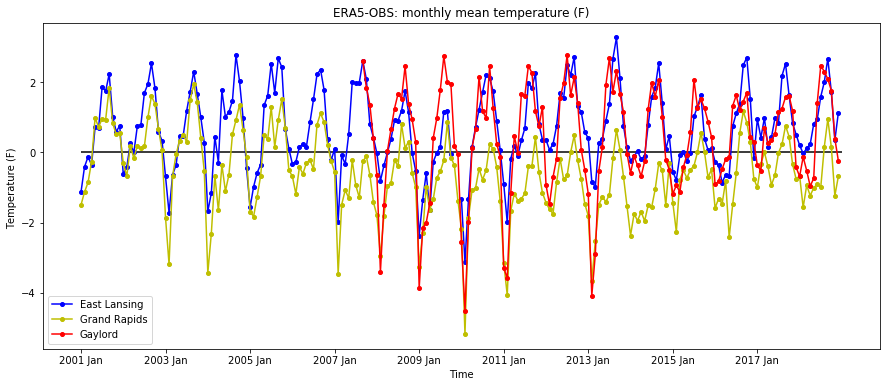

In [13]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), t_mon_era_el-t_mon_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_mon_era_gr-t_mon_obs_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_mon_era_gl-t_mon_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)])
plt.xlabel('Time')
plt.ylabel('Temperature (F) ')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: monthly mean temperature (F)')
plt.savefig('./plot/Summary/temperature_diff.png')

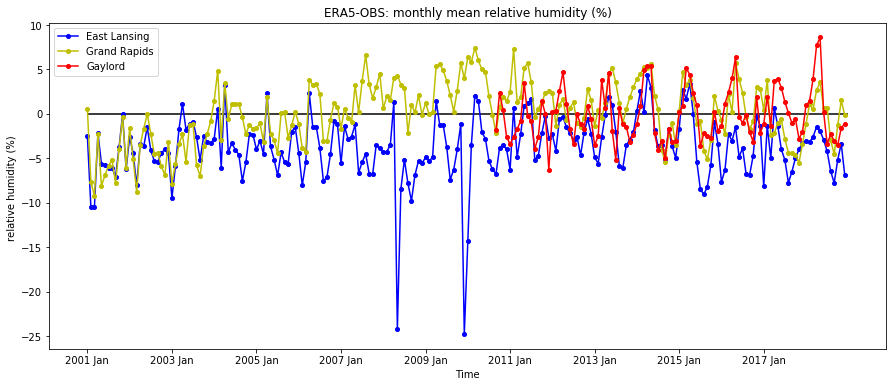

In [14]:
rh_mon_obs_el = np.array(df_el.groupby([df_el.YEAR,df_el.MONTH])['relh'].mean())
rh_mon_era_el = np.array(era_el.groupby([era_el.YEAR,era_el.MONTH])['relh'].mean())

rh_mon_obs_gl = np.array(df_gl.groupby([df_gl.YEAR,df_gl.MONTH])['relh'].mean())
rh_mon_era_gl = np.array(era_gl.groupby([era_gl.YEAR,era_gl.MONTH])['relh'].mean())

rh_mon_obs_gr = np.array(df_gr.groupby([df_gr.YEAR,df_gr.MONTH])['relh'].mean())
rh_mon_era_gr = np.array(era_gr.groupby([era_gr.YEAR,era_gr.MONTH])['relh'].mean())

plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), rh_mon_era_el-rh_mon_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), rh_mon_era_gr-rh_mon_obs_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), rh_mon_era_gl-rh_mon_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)])
plt.xlabel('Time')
plt.ylabel('relative humidity (%) ')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: monthly mean relative humidity (%)')
plt.savefig('./plot/Summary/rh_diff.png')

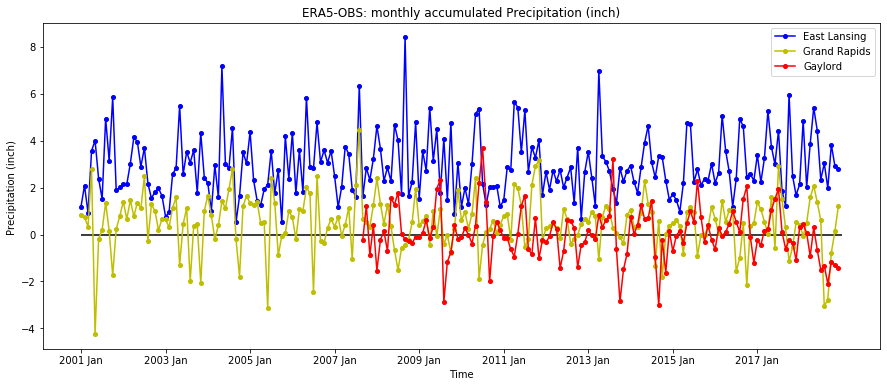

In [39]:
prcp_mon_obs_el = np.array(df_el.groupby([df_el.YEAR,df_el.MONTH])['pcpn'].sum())
prcp_mon_era_el = np.array(era_el.groupby([era_el.YEAR,era_el.MONTH])['pcpn'].sum())

prcp_mon_obs_gl = np.array(df_gl.groupby([df_gl.YEAR,df_gl.MONTH])['pcpn'].sum())
prcp_mon_era_gl = np.array(era_gl.groupby([era_gl.YEAR,era_gl.MONTH])['pcpn'].sum())

prcp_mon_obs_gr = np.array(df_gr.groupby([df_gr.YEAR,df_gr.MONTH])['pcpn'].sum())
prcp_mon_era_gr = np.array(era_gr.groupby([era_gr.YEAR,era_gr.MONTH])['pcpn'].sum())

plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), prcp_mon_era_el-prcp_mon_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), prcp_mon_era_gr-prcp_mon_obs_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), prcp_mon_era_gl-prcp_mon_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)])
plt.xlabel('Time')
plt.ylabel('Precipitation (inch) ')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: monthly accumulated Precipitation (inch)')
plt.savefig('./plot/Summary/Precipitation_diff.png')

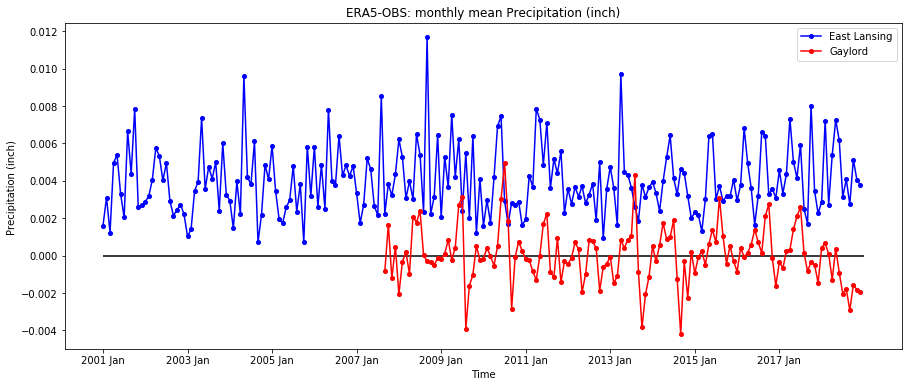

In [47]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), prcp_mon_era_el-prcp_mon_obs_el, 'b-o', lw=1.5, ms=4)
# plt.plot(list(range(1,217)), prcp_mon_era_gr-prcp_mon_obs_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), prcp_mon_era_gl-prcp_mon_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)])
plt.xlabel('Time')
plt.ylabel('Precipitation (inch) ')
plt.legend(['East Lansing','Gaylord'])
plt.title('ERA5-OBS: monthly mean Precipitation (inch)')
plt.savefig('./plot/Summary/Precipitation_diff_2.png')

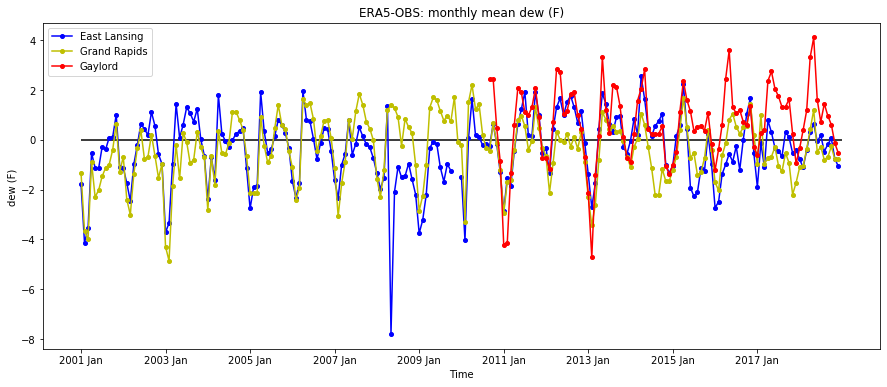

In [15]:
dew_mon_obs_el = np.array(df_el.groupby([df_el.YEAR,df_el.MONTH])['dew'].mean())
dew_mon_era_el = np.array(era_el.groupby([era_el.YEAR,era_el.MONTH])['dew'].mean())

dew_mon_obs_gl = np.array(df_gl.groupby([df_gl.YEAR,df_gl.MONTH])['dew'].mean())
dew_mon_era_gl = np.array(era_gl.groupby([era_gl.YEAR,era_gl.MONTH])['dew'].mean())

dew_mon_obs_gr = np.array(df_gr.groupby([df_gr.YEAR,df_gr.MONTH])['dew'].mean())
dew_mon_era_gr = np.array(era_gr.groupby([era_gr.YEAR,era_gr.MONTH])['dew'].mean())

plt.figure(figsize=(15,6))
plt.plot(list(range(1,217)), dew_mon_era_el-dew_mon_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), dew_mon_era_gr-dew_mon_obs_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), dew_mon_era_gl-dew_mon_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)])
plt.xlabel('Time')
plt.ylabel('dew (F) ')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: monthly mean dew (F)')
plt.savefig('./plot/Summary/dew_diff.png')

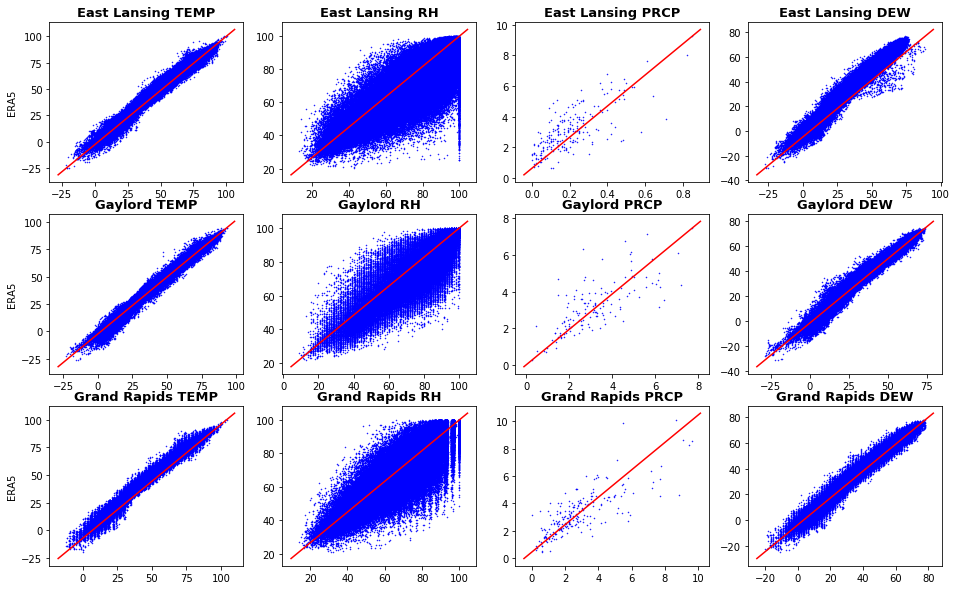

In [49]:
obs_data = [df_el.atmp, df_el.relh, prcp_mon_obs_el, df_el.dew, df_gl.atmp, df_gl.relh, prcp_mon_obs_gl, df_gl.dew, df_gr.atmp, df_gr.relh, prcp_mon_obs_gr, df_gr.dew]
era_data = [era_el.atmp, era_el.relh, prcp_mon_era_el, era_el.dew, era_gl.atmp, era_gl.relh, prcp_mon_era_gl, era_gl.dew, era_gr.atmp, era_gr.relh, prcp_mon_era_gr, era_gr.dew]
title = ['East Lansing TEMP', 'East Lansing RH', 'East Lansing PRCP', 'East Lansing DEW', 'Gaylord TEMP', 'Gaylord RH', 'Gaylord PRCP', 'Gaylord DEW', 'Grand Rapids TEMP', 'Grand Rapids RH', 'Grand Rapids PRCP', 'Grand Rapids DEW']

plt.subplots(3, 4, figsize=(16, 10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.plot(obs_data[i], era_data[i], 'bo', ms=.5)
    plt.title(title[i],  fontsize = 13, fontweight='bold')
    plt.plot(ax.get_xlim(), ax.get_ylim(), 'r')
    if not (i % 4):
        plt.ylabel('ERA5')
        
plt.savefig('./plot/Summary/3by4.png')

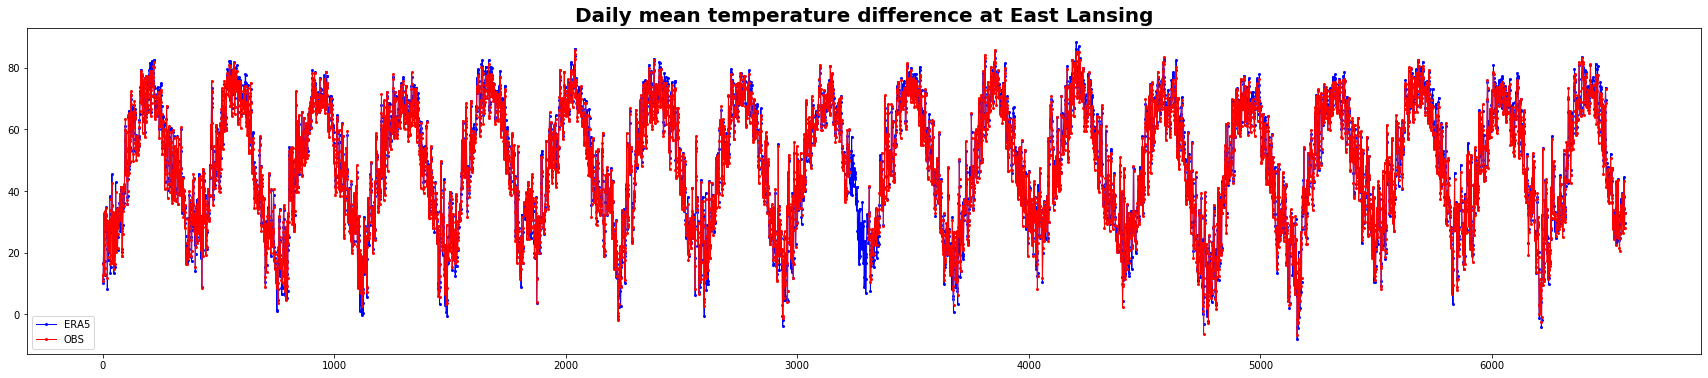

In [15]:
temp_day_obs_el = np.array(df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].mean())
temp_day_era_el = np.array(era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].mean())
plt.figure(figsize=(30,6))
plt.plot(list(range(1,6575)), temp_day_era_el, 'b-o', lw=1, ms=2)
plt.plot(list(range(1,6575)), temp_day_obs_el, 'r-o', lw=1, ms=2)
plt.title('Daily mean temperature difference at East Lansing', fontsize = 20, fontweight='bold')
plt.legend(['ERA5', 'OBS'],loc='lower left')
plt.savefig('./plot/Summary/daily_temp_diff_el.png')

In [79]:
?plt.legend

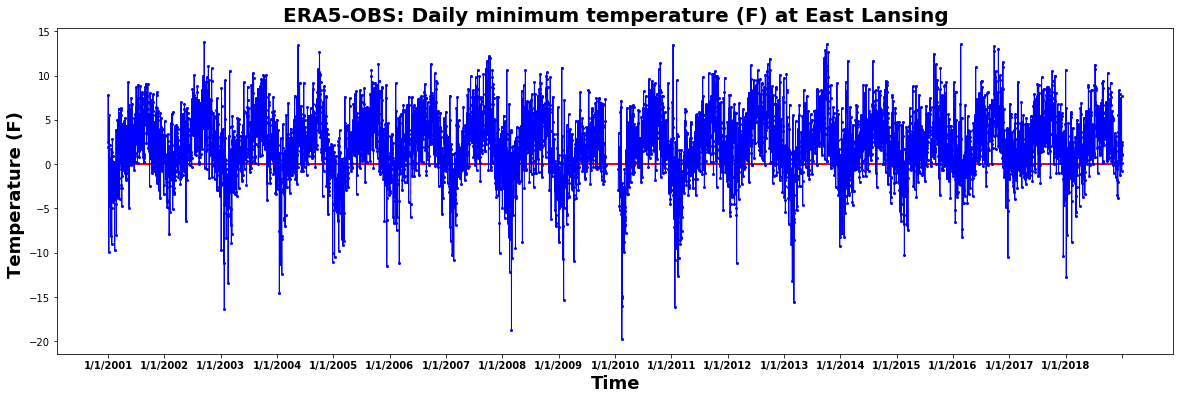

In [7]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()

t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()

t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()

plt.figure(figsize=(20,6))
plt.plot(list(range(1,6575)), t_daymin_era_el-t_daymin_obs_el, 'b-o', lw=1, ms=2)
# plt.plot(list(range(1,6574)), t_daymin_era_gr-t_daymin_obs_gr, 'y-o', lw=1.5, ms=4)
# plt.plot(list(range(81,217)), t_daymin_era_gl-t_daymin_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 6575, 'r', lw=2)
plt.xticks(np.arange(1, 6575, step=365),['1/1/{0}'.format(i+2001) for i in range(18)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily minimum temperature (F) at East Lansing', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_min_EL.png')

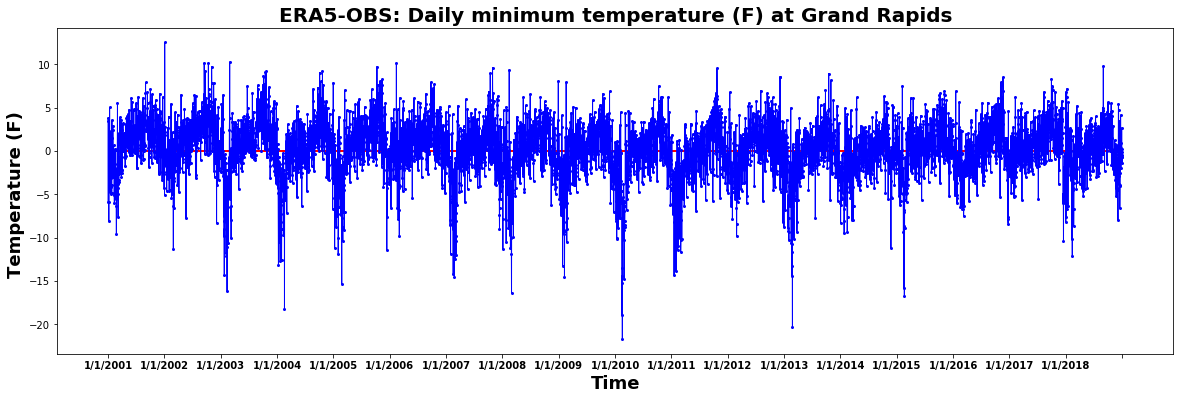

In [8]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()

t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()

t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()

plt.figure(figsize=(20,6))
# plt.plot(list(range(1,6575)), t_daymin_era_el-t_daymin_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,6574)), t_daymin_era_gr-t_daymin_obs_gr, 'b-o', lw=1, ms=2)
# plt.plot(list(range(81,217)), t_daymin_era_gl-t_daymin_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 6574, 'r', lw=2)
plt.xticks(np.arange(1, 6574, step=365),['1/1/{0}'.format(i+2001) for i in range(18)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily minimum temperature (F) at Grand Rapids', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_min_gr.png')

In [51]:
df_gl.YEAR = era_gl.YEAR
df_gl.MONTH = era_gl.MONTH
df_gl.DAY = era_gl.DAY
df_gl.HOUR = era_gl.HOUR

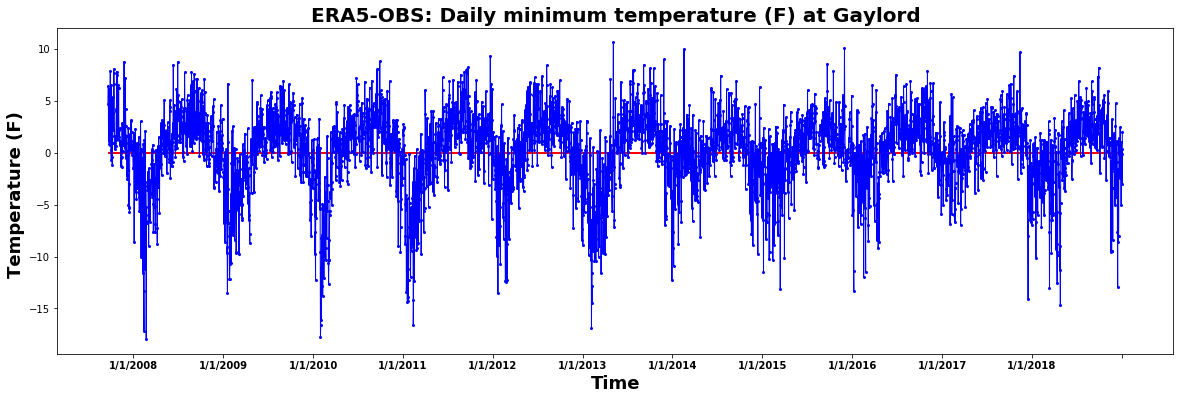

In [10]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()

t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()

t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()

plt.figure(figsize=(20,6))
# plt.plot(list(range(1,6575)), t_daymin_era_el-t_daymin_obs_el, 'b-o', lw=1.5, ms=4)
# plt.plot(list(range(1,6574)), t_daymin_era_gr-t_daymin_obs_gr, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,4123)), t_daymin_era_gl-t_daymin_obs_gl, 'b-o', lw=1, ms=2)
plt.hlines(0, 1, 4123, 'r', lw=2)
plt.xticks(np.arange(104, 4123, step=365),['1/1/{0}'.format(i+2008) for i in range(11)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily minimum temperature (F) at Gaylord', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_min_gl.png')

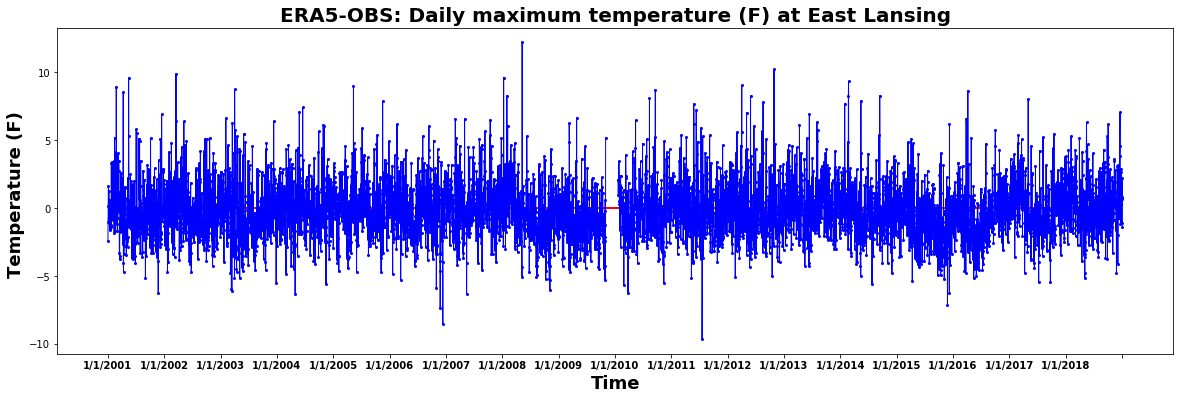

In [11]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()

t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()

t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()

plt.figure(figsize=(20,6))
plt.plot(list(range(1,6575)), t_daymax_era_el-t_daymax_obs_el, 'b-o', lw=1, ms=2)
# plt.plot(list(range(1,6574)), t_daymax_era_gr-t_daymax_obs_gr, 'y-o', lw=1.5, ms=4)
# plt.plot(list(range(81,217)), t_daymax_era_gl-t_daymax_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 6575, 'r', lw=2)
plt.xticks(np.arange(1, 6575, step=365),['1/1/{0}'.format(i+2001) for i in range(18)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily maximum temperature (F) at East Lansing', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_max_EL.png')

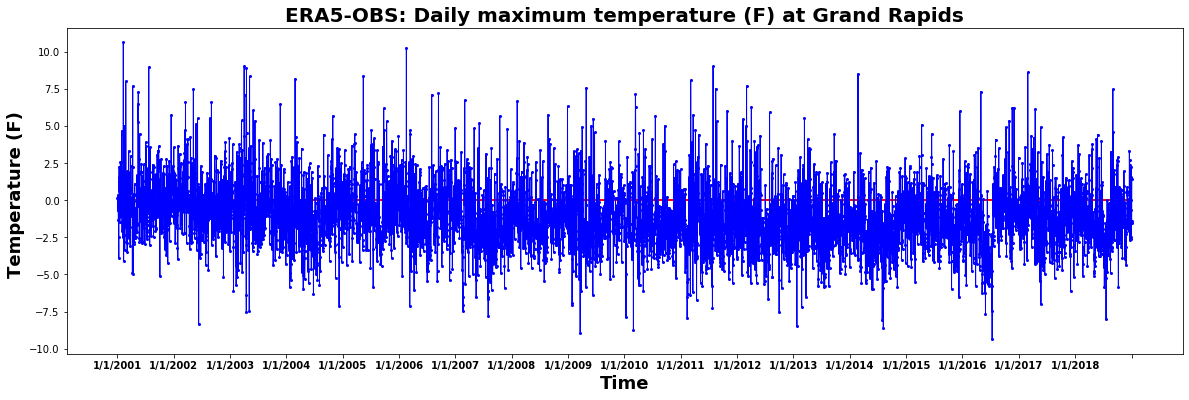

In [12]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()

t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()

t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()

plt.figure(figsize=(20,6))
# plt.plot(list(range(1,6575)), t_daymax_era_el-t_daymax_obs_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,6574)), t_daymax_era_gr-t_daymax_obs_gr, 'b-o', lw=1, ms=2)
# plt.plot(list(range(81,217)), t_daymax_era_gl-t_daymax_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 6574, 'r', lw=2)
plt.xticks(np.arange(1, 6574, step=365),['1/1/{0}'.format(i+2001) for i in range(18)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily maximum temperature (F) at Grand Rapids', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_max_gr.png')

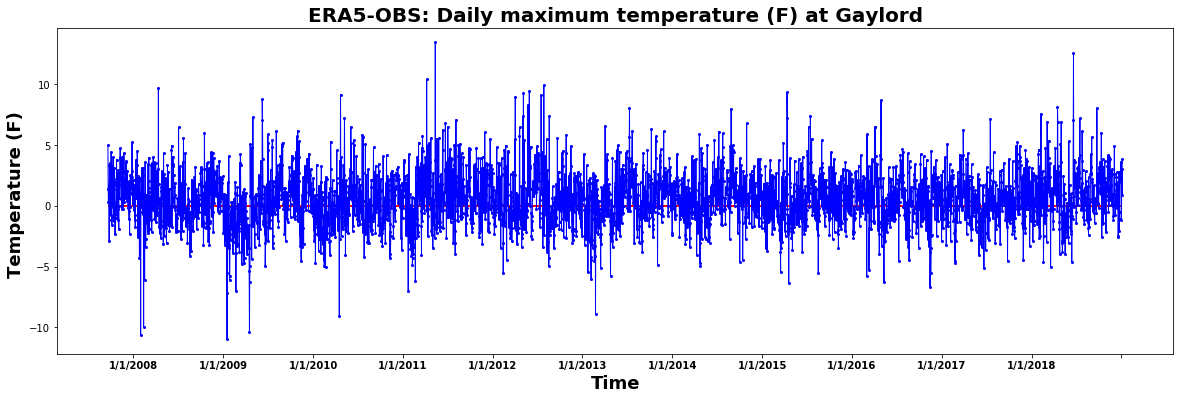

In [13]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()

t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()

t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()

plt.figure(figsize=(20,6))
# plt.plot(list(range(1,6575)), t_daymax_era_el-t_daymax_obs_el, 'b-o', lw=1.5, ms=4)
# plt.plot(list(range(1,6574)), t_daymax_era_gr-t_daymax_obs_gr, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,4123)), t_daymax_era_gl-t_daymax_obs_gl, 'b-o', lw=1, ms=2)
plt.hlines(0, 1, 4123, 'r', lw=2)
plt.xticks(np.arange(104, 4123, step=365),['1/1/{0}'.format(i+2008) for i in range(11)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily maximum temperature (F) at Gaylord', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_max_gl.png')

In [ ]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()


plt.figure(figsize=(20,6))
plt.plot(list(range(1,6575)), t_daymin_era_el-t_daymin_obs_el, 'b-o', lw=1, ms=2)
# plt.plot(list(range(1,6574)), t_daymin_era_gr-t_daymin_obs_gr, 'y-o', lw=1.5, ms=4)
# plt.plot(list(range(81,217)), t_daymin_era_gl-t_daymin_obs_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 6575, 'r', lw=2)
plt.xticks(np.arange(1, 6575, step=365),['1/1/{0}'.format(i+2001) for i in range(18)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
# plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'])
plt.title('ERA5-OBS: Daily minimum temperature (F) at East Lansing', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/temp_min_EL.png')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


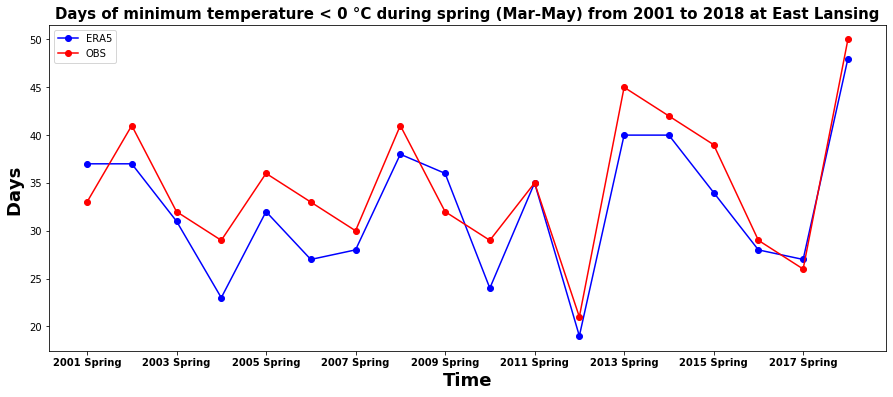

In [43]:
days_obs_el = np.zeros(18)
days_era_el = np.zeros(18)
for i in range(18):
    days_obs_el[i] = np.where(np.array(t_daymin_obs_el[(59+(365*i)):(152+(365*i))])<32,1,0).sum() + days_obs_el[i]
    days_era_el[i] = np.where(np.array(t_daymin_era_el[(59+(365*i)):(152+(365*i))])<32,1,0).sum() + days_era_el[i]
    
plt.figure(figsize=(15,6))
plt.plot(list(range(1,19)), days_era_el, 'b-o')
plt.plot(list(range(1,19)), days_obs_el, 'r-o')
plt.xticks(np.arange(1, 19, step=2),['{0} Spring'.format(i*2+2001) for i in range(9)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Days ', fontsize = 18, fontweight='bold')
plt.legend(['ERA5','OBS'])
plt.title('Days of minimum temperature < 0 \u00b0C during spring (Mar-May) from 2001 to 2018 at East Lansing', fontsize = 15, fontweight='bold')
plt.savefig('./plot/Summary/temp_0_el.png')

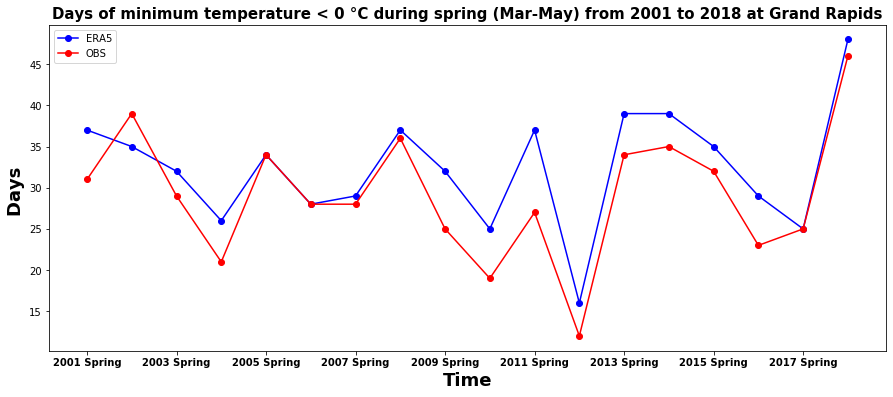

In [44]:
days_obs_gr = np.zeros(18)
days_era_gr = np.zeros(18)
for i in range(18):
    days_obs_gr[i] = np.where(np.array(t_daymin_obs_gr[(59+(365*i)):(152+(365*i))])<32,1,0).sum() + days_obs_gr[i]
    days_era_gr[i] = np.where(np.array(t_daymin_era_gr[(59+(365*i)):(152+(365*i))])<32,1,0).sum() + days_era_gr[i]
    
plt.figure(figsize=(15,6))
plt.plot(list(range(1,19)), days_era_gr, 'b-o')
plt.plot(list(range(1,19)), days_obs_gr, 'r-o')
plt.xticks(np.arange(1, 19, step=2),['{0} Spring'.format(i*2+2001) for i in range(9)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Days ', fontsize = 18, fontweight='bold')
plt.legend(['ERA5','OBS'])
plt.title('Days of minimum temperature < 0 \u00b0C during spring (Mar-May) from 2001 to 2018 at Grand Rapids', fontsize = 15, fontweight='bold')
plt.savefig('./plot/Summary/temp_0_gr.png')

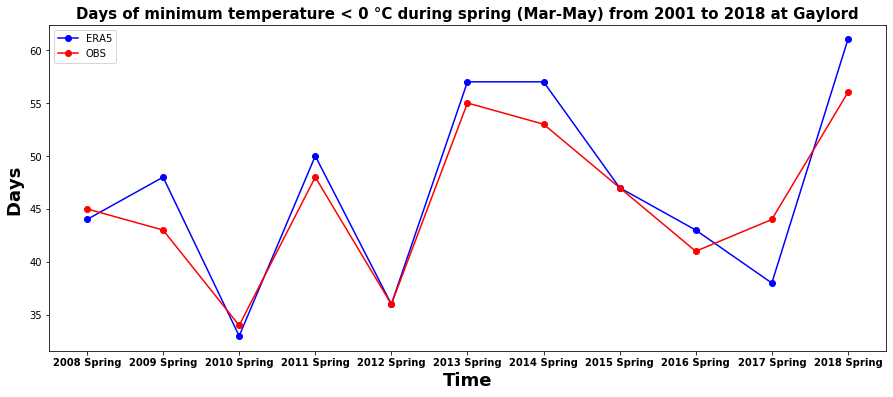

In [45]:
days_obs_gl = np.zeros(11)
days_era_gl = np.zeros(11)
for i in range(11):
    days_obs_gl[i] = np.where(np.array(t_daymin_obs_gl[(105+59+(365*i)):(105+152+(365*i))])<32,1,0).sum() + days_obs_gl[i]
    days_era_gl[i] = np.where(np.array(t_daymin_era_gl[(105+59+(365*i)):(105+152+(365*i))])<32,1,0).sum() + days_era_gl[i]
       
plt.figure(figsize=(15,6))
plt.plot(list(range(1,12)), days_era_gl, 'b-o')
plt.plot(list(range(1,12)), days_obs_gl, 'r-o')
plt.xticks(np.arange(1, 12, step=1),['{0} Spring'.format(i+2008) for i in range(12)], fontsize = 10, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Days ', fontsize = 18, fontweight='bold')
plt.legend(['ERA5','OBS'])
plt.title('Days of minimum temperature < 0 \u00b0C during spring (Mar-May) from 2001 to 2018 at Gaylord', fontsize = 15, fontweight='bold')
plt.savefig('./plot/Summary/temp_0_gl.png')

In [3]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()

t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()

t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()

t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()

t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()

t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()

t_daymean_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].mean()
t_daymean_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].mean()

t_daymean_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].mean()
t_daymean_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].mean()

t_daymean_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].mean()
t_daymean_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].mean()

In [4]:
days_obs_el = np.zeros((93,18))
days_era_el = np.zeros((93,18))
days_obs_gl = np.zeros((93,11))
days_era_gl = np.zeros((93,11))
days_obs_gr = np.zeros((93,18))
days_era_gr = np.zeros((93,18))
for i in range(18):
    days_obs_el[:,i] = np.where(np.array(t_daymin_obs_el[(59+(365*i)):(152+(365*i))])<32,1,0)
    days_era_el[:,i] = np.where(np.array(t_daymin_era_el[(59+(365*i)):(152+(365*i))])<32,1,0)
    days_obs_gr[:,i] = np.where(np.array(t_daymin_obs_gr[(59+(365*i)):(152+(365*i))])<32,1,0)
    days_era_gr[:,i] = np.where(np.array(t_daymin_era_gr[(59+(365*i)):(152+(365*i))])<32,1,0)
for i in range(11):
    days_obs_gl[:,i] = np.where(np.array(t_daymin_obs_gl[(105+59+(365*i)):(105+152+(365*i))])<32,1,0)
    days_era_gl[:,i] = np.where(np.array(t_daymin_era_gl[(105+59+(365*i)):(105+152+(365*i))])<32,1,0)



/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


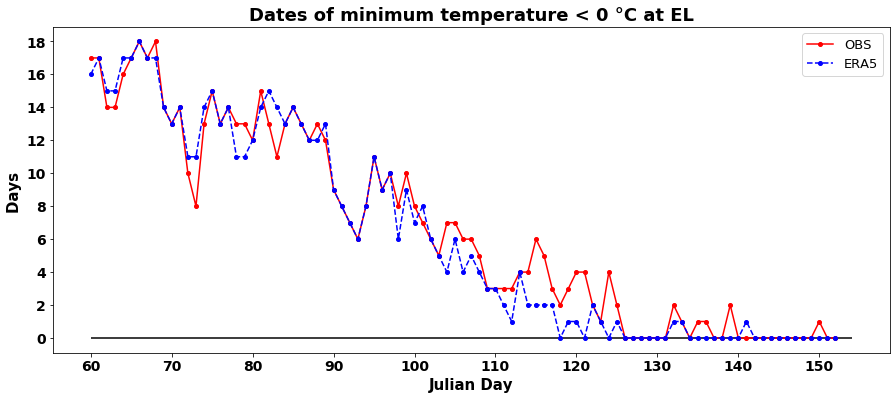

In [81]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), days_obs_el.sum(axis=1), 'r-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), days_era_el.sum(axis=1), 'b--o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 20, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['OBS', 'ERA5'], fontsize=13)
plt.title('Dates of minimum temperature < 0 \u00b0C at EL', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/dates_el.png')

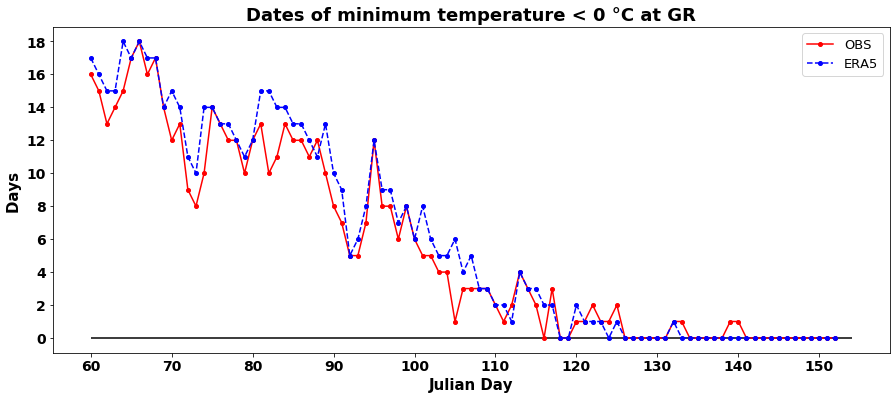

In [82]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), days_obs_gr.sum(axis=1), 'r-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), days_era_gr.sum(axis=1), 'b--o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 20, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['OBS', 'ERA5'], fontsize=13)
plt.title('Dates of minimum temperature < 0 \u00b0C at GR', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/dates_gr.png')

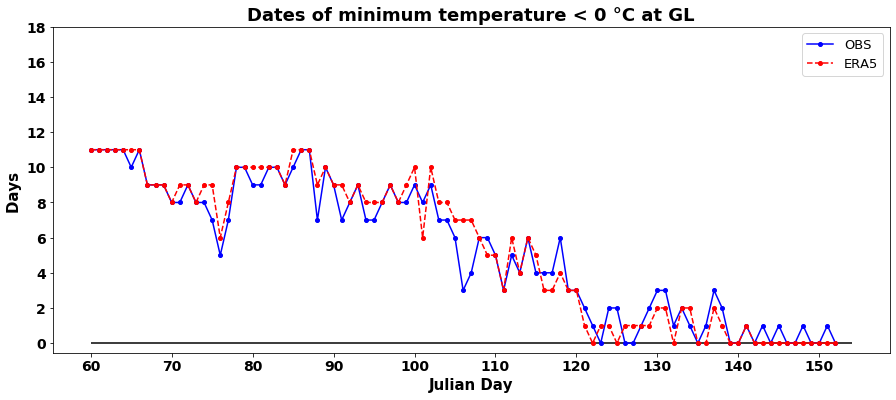

In [83]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), days_obs_gl.sum(axis=1), 'b-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), days_era_gl.sum(axis=1), 'r--o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 20, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['OBS', 'ERA5'], fontsize=13)
plt.title('Dates of minimum temperature < 0 \u00b0C at GL', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/dates_gl.png')

In [5]:
ratio_fre_el = np.zeros(93)
ratio_all_el = np.zeros(93)
ratio_fre_gr = np.zeros(93)
ratio_all_gr = np.zeros(93)
ratio_fre_gl = np.zeros(93)
ratio_all_gl = np.zeros(93)
for i in range(93):
    for j in range(18):
        if days_era_el[i,j] == days_obs_el[i,j]:
            ratio_all_el[i] = ratio_all_el[i] + 1
            if days_era_el[i,j] == 1.0:
                ratio_fre_el[i] = ratio_fre_el[i] + 1
        if days_era_gr[i,j] == days_obs_gr[i,j]:
            ratio_all_gr[i] = ratio_all_gr[i] + 1
            if days_era_gr[i,j] == 1.0:
                ratio_fre_gr[i] = ratio_fre_gr[i] + 1
    for j in range(11):
        if days_era_gl[i,j] == days_obs_gl[i,j]:
            ratio_all_gl[i] = ratio_all_gl[i] + 1
            if days_era_gl[i,j] == 1.0:
                ratio_fre_gl[i] = ratio_fre_gl[i] + 1

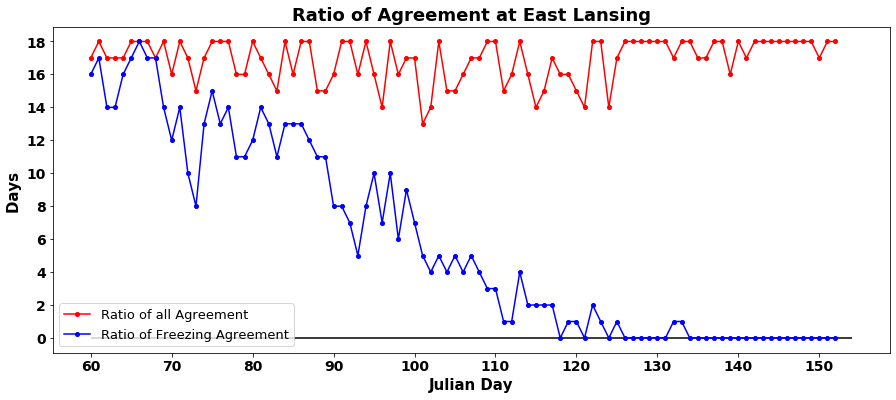

In [15]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), ratio_all_el, 'r-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), ratio_fre_el, 'b-o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 20, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['Ratio of all Agreement', 'Ratio of Freezing Agreement'], fontsize=13)
plt.title('Ratio of Agreement at East Lansing', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/ratio_el.png')

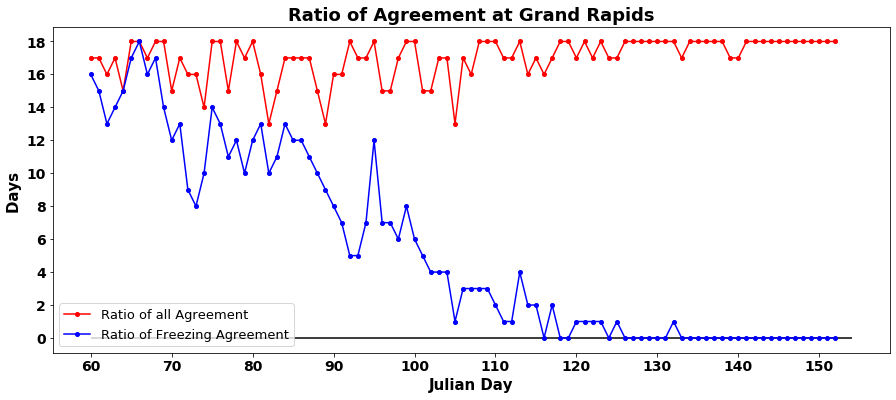

In [16]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), ratio_all_gr, 'r-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), ratio_fre_gr, 'b-o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 20, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['Ratio of all Agreement', 'Ratio of Freezing Agreement'], fontsize=13)
plt.title('Ratio of Agreement at Grand Rapids', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/ratio_gr.png')

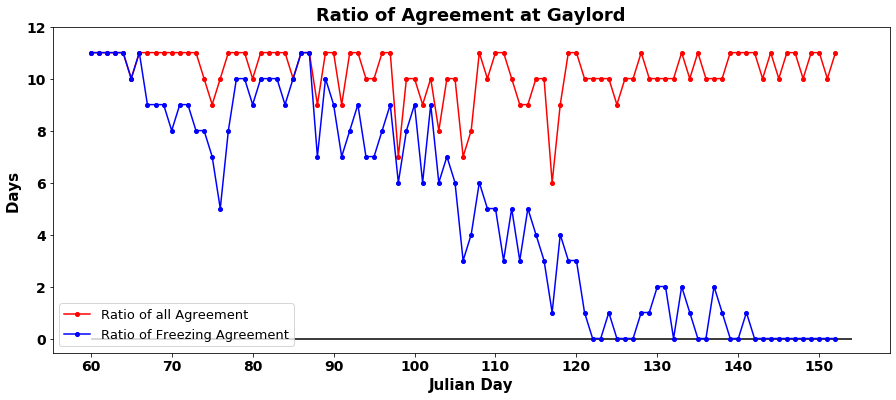

In [19]:
plt.figure(figsize=(15,6))
plt.plot(list(range(60,153)), ratio_all_gl, 'r-o', lw=1.5, ms=4)
plt.plot(list(range(60,153)), ratio_fre_gl, 'b-o', lw=1.5, ms=4)
plt.hlines(0, 60, 154, 'k', lw=1.5)
plt.xticks(np.arange(60, 154, step=10), fontsize=14,fontweight='bold')
plt.yticks(np.arange(0, 14, step=2), fontsize=14,fontweight='bold')
plt.xlabel('Julian Day', fontsize=15,fontweight='bold')
plt.ylabel('Days ', fontsize=15,fontweight='bold')
plt.legend(['Ratio of all Agreement', 'Ratio of Freezing Agreement'], fontsize=13)
plt.title('Ratio of Agreement at Gaylord', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/ratio_gl.png')

In [4]:
l_el = t_daymin_obs_el.shape[0]
l_gr = t_daymin_obs_gr.shape[0]
l_gl = t_daymin_obs_gl.shape[0]
ratioc_el = np.zeros((l_el,5))*np.nan
ratioc_gr = np.zeros((l_gr,5))*np.nan
ratioc_gl = np.zeros((l_gl,5))*np.nan
ratioc = [ratioc_el, ratioc_gr, ratioc_gl]
ratioobs = [ratioc_el, ratioc_gr, ratioc_gl]
ratioera = [ratioc_el, ratioc_gr, ratioc_gl]
l = [l_el, l_gr, l_gl]
t_daymin_obs = [np.array(t_daymin_obs_el), np.array(t_daymin_obs_gr), np.array(t_daymin_obs_gl)]
t_daymin_era = [np.array(t_daymin_era_el), np.array(t_daymin_era_gr), np.array(t_daymin_era_gl)]
for i in range(3):
    for j in range(l[i]):
        if np.logical_and((t_daymin_obs[i][j] <= 32),(t_daymin_obs[i][j] > 23)):
            t_daymin_obs[i][j] = 1
        elif np.logical_and((t_daymin_obs[i][j] <= 23),(t_daymin_obs[i][j] > 14)):
            t_daymin_obs[i][j] = 2
        elif np.logical_and((t_daymin_obs[i][j] <= 14),(t_daymin_obs[i][j] > 5)):
            t_daymin_obs[i][j] = 3
        elif np.logical_and((t_daymin_obs[i][j] <= 5),(t_daymin_obs[i][j] > -4)):
            t_daymin_obs[i][j] = 4
        elif np.logical_and((t_daymin_obs[i][j] <= -4),(t_daymin_obs[i][j] > -13)):
            t_daymin_obs[i][j] = 5
        else:
            t_daymin_obs[i][j] = np.nan
            
        if np.logical_and((t_daymin_era[i][j] <= 32),(t_daymin_era[i][j] > 23)):
            t_daymin_era[i][j] = 1
        elif np.logical_and((t_daymin_era[i][j] <= 23),(t_daymin_era[i][j] > 14)):
            t_daymin_era[i][j] = 2
        elif np.logical_and((t_daymin_era[i][j] <= 14),(t_daymin_era[i][j] > 5)):
            t_daymin_era[i][j] = 3
        elif np.logical_and((t_daymin_era[i][j] <= 5),(t_daymin_era[i][j] > -4)):
            t_daymin_era[i][j] = 4
        elif np.logical_and((t_daymin_era[i][j] <= -4),(t_daymin_era[i][j] > -13)):
            t_daymin_era[i][j] = 5
        else:
            t_daymin_era[i][j] = np.nan

        
for i in range(3):
    for j in range(5):
        ratioc[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(t_daymin_era[i][:] == j+1)), 1.0, ratioc[i][:,j])
        ratioc[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(t_daymin_era[i][:] != j+1)), 0.0, ratioc[i][:,j])


In [105]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_el = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[0][:,0],
                         '-10~-5':ratioc[0][:,1],
                         '-15~-10':ratioc[0][:,2],
                         '-20~-15':ratioc[0][:,3],
                         '-25~-20':ratioc[0][:,4]})
ratiotc_el.to_csv('ratiotc_el.csv')
# ratiotc_el
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[0][:]}).groupby(ratiotc_el.MONTH)['a'].value_counts()
a.to_csv('./summary/el_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[0][:]}).groupby(ratiotc_el.MONTH)['a'].value_counts()
a.to_csv('./summary/el_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [10]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_gr = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[1][:,0],
                         '-10~-5':ratioc[1][:,1],
                         '-15~-10':ratioc[1][:,2],
                         '-20~-15':ratioc[1][:,3],
                         '-25~-20':ratioc[1][:,4]})
ratiotc_gr.to_csv('ratiotc_gr.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[1][:]}).groupby(ratiotc_gr.MONTH)['a'].value_counts()
a.to_csv('./summary/gr_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[1][:]}).groupby(ratiotc_gr.MONTH)['a'].value_counts()
a.to_csv('./summary/gr_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [9]:
dff = pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_gl = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[2][:,0],
                         '-10~-5':ratioc[2][:,1],
                         '-15~-10':ratioc[2][:,2],
                         '-20~-15':ratioc[2][:,3],
                         '-25~-20':ratioc[2][:,4]})
ratiotc_gl.to_csv('ratiotc_gl.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[2][:]}).groupby(ratiotc_gl.MONTH)['a'].value_counts()
a.to_csv('./summary/gl_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[2][:]}).groupby(ratiotc_gl.MONTH)['a'].value_counts()
a.to_csv('./summary/gl_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app


In [91]:
ratiotca_el = pd.DataFrame({
                         '-5~0':ratiotc_el.groupby(ratiotc_el.MONTH)['-5~0'].sum() / ratiotc_el.groupby(ratiotc_el.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_el.groupby(ratiotc_el.MONTH)['-10~-5'].sum() / ratiotc_el.groupby(ratiotc_el.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_el.groupby(ratiotc_el.MONTH)['-15~-10'].sum() / ratiotc_el.groupby(ratiotc_el.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_el.groupby(ratiotc_el.MONTH)['-20~-15'].sum() / ratiotc_el.groupby(ratiotc_el.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_el.groupby(ratiotc_el.MONTH)['-25~-20'].sum() / ratiotc_el.groupby(ratiotc_el.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_el.groupby(ratiotc_el.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_el.to_csv('ratiotca_el.csv')
ratiotca_el

-5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
MONTH                                                                  
1      0.840909  0.604317  0.669811  0.610390  0.592593      111/132   
10     0.161290       NaN       NaN       NaN       NaN        15/93   
11     0.649485  0.384615  0.500000  1.000000       NaN      126/194   
12     0.850000  0.638158  0.452830  0.705882  0.500000      170/200   
2      0.704545  0.580882  0.660377  0.633333  0.500000       93/132   
3      0.821990  0.550336  0.596491  0.692308  0.666667      157/191   
4      0.668874  0.300000       NaN       NaN       NaN      101/151   
5      0.214286       NaN       NaN       NaN       NaN         3/14   
6           NaN       NaN       NaN       NaN       NaN          0/0   
7           NaN       NaN       NaN       NaN       NaN          0/0   
8           NaN       NaN       NaN       NaN       NaN          0/0   
9           NaN       NaN       NaN       NaN       NaN          0/0   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1             84/139          71/106           47/77           16/27  
10               0/0             0/0             0/0             0/0  
11             30/78             3/6             1/1             0/0  
12            97/152           24/53           12/17             3/6  
2             79/136          70/106           38/60           10/20  
3             82/149           34/57            9/13             2/3  
4               6/20             0/0             0/0             0/0  
5                0/0             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [92]:
ratiotca_gl = pd.DataFrame({
                         '-5~0':ratiotc_gl.groupby(ratiotc_gl.MONTH)['-5~0'].sum() / ratiotc_gl.groupby(ratiotc_gl.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_gl.groupby(ratiotc_gl.MONTH)['-10~-5'].sum() / ratiotc_gl.groupby(ratiotc_gl.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_gl.groupby(ratiotc_gl.MONTH)['-15~-10'].sum() / ratiotc_gl.groupby(ratiotc_gl.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_gl.groupby(ratiotc_gl.MONTH)['-20~-15'].sum() / ratiotc_gl.groupby(ratiotc_gl.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_gl.groupby(ratiotc_gl.MONTH)['-25~-20'].sum() / ratiotc_gl.groupby(ratiotc_gl.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_gl.groupby(ratiotc_gl.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_gl.to_csv('ratiotca_gl.csv')
ratiotca_gl

-5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
MONTH                                                                  
1      0.785714  0.735632  0.600000  0.465753  0.600000        44/56   
10     0.419753  0.000000       NaN       NaN       NaN        34/81   
11     0.812903  0.468750  0.500000  0.000000       NaN      126/155   
12     0.797980  0.678322  0.662500  0.727273  0.750000        79/99   
2      0.686275  0.571429  0.545455  0.625000  0.764706        35/51   
3      0.744681  0.626263  0.622951  0.750000  1.000000        70/94   
4      0.771429  0.666667  0.600000       NaN       NaN      108/140   
5      0.454545       NaN       NaN       NaN       NaN        15/33   
6      0.000000       NaN       NaN       NaN       NaN          0/1   
7           NaN       NaN       NaN       NaN       NaN          0/0   
8           NaN       NaN       NaN       NaN       NaN          0/0   
9      0.000000       NaN       NaN       NaN       NaN          0/1   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1              64/87          60/100           34/73            9/15  
10               0/1             0/0             0/0             0/0  
11             30/64           10/20             0/3             0/0  
12            97/143           53/80           16/22             3/4  
2              48/84           48/88           35/56           13/17  
3              62/99           38/61           21/28             6/6  
4              22/33            6/10             0/0             0/0  
5                0/0             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [93]:
ratiotca_gr = pd.DataFrame({
                         '-5~0':ratiotc_gr.groupby(ratiotc_gr.MONTH)['-5~0'].sum() / ratiotc_gr.groupby(ratiotc_gr.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_gr.groupby(ratiotc_gr.MONTH)['-10~-5'].sum() / ratiotc_gr.groupby(ratiotc_gr.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_gr.groupby(ratiotc_gr.MONTH)['-15~-10'].sum() / ratiotc_gr.groupby(ratiotc_gr.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_gr.groupby(ratiotc_gr.MONTH)['-20~-15'].sum() / ratiotc_gr.groupby(ratiotc_gr.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_gr.groupby(ratiotc_gr.MONTH)['-25~-20'].sum() / ratiotc_gr.groupby(ratiotc_gr.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_gr.groupby(ratiotc_gr.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_gr.to_csv('ratiotca_gr.csv')
ratiotca_gr

-5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
MONTH                                                                  
1      0.776316  0.695122  0.554545  0.516667  0.538462      118/152   
10     0.134615       NaN       NaN       NaN       NaN         7/52   
11     0.675258  0.545455  0.333333       NaN       NaN      131/194   
12     0.825328  0.735849  0.581395  0.666667  0.333333      189/229   
2      0.691729  0.543750  0.632075  0.545455  0.363636       92/133   
3      0.820388  0.607407  0.568182  0.600000  1.000000      169/206   
4      0.770492  0.368421       NaN       NaN       NaN       94/122   
5      0.200000       NaN       NaN       NaN       NaN         2/10   
6           NaN       NaN       NaN       NaN       NaN          0/0   
7           NaN       NaN       NaN       NaN       NaN          0/0   
8           NaN       NaN       NaN       NaN       NaN          0/0   
9           NaN       NaN       NaN       NaN       NaN          0/0   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1            114/164          61/110           31/60            7/13  
10               0/0             0/0             0/0             0/0  
11             30/55             1/3             0/0             0/0  
12           117/159           25/43            8/12             1/3  
2             87/160          67/106           24/44            4/11  
3             82/135           25/44            6/10             2/2  
4               7/19             0/0             0/0             0/0  
5                0/0             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [53]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_el = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff_el':np.array(t_daymax_era_el-t_daymax_obs_el),
             't_daymin_diff_el':np.array(t_daymin_era_el-t_daymin_obs_el),
             't_daymean_diff_el':np.array(t_daymean_era_el-t_daymean_obs_el)})
mdiff_el = mdiff_el.astype(float)
t_daymax_diff_el = np.nanmean(np.array(mdiff_el.groupby([mdiff_el.YEAR,mdiff_el.MONTH])['t_daymax_diff_el'].mean()).reshape((12,-1)), axis=1)
t_daymin_diff_el = np.nanmean(np.array(mdiff_el.groupby([mdiff_el.YEAR,mdiff_el.MONTH])['t_daymin_diff_el'].mean()).reshape((12,-1)), axis=1)
t_daymean_diff_el = np.nanmean(np.array(mdiff_el.groupby([mdiff_el.YEAR,mdiff_el.MONTH])['t_daymean_diff_el'].mean()).reshape((12,-1)), axis=1)

In [54]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_gr = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff_gr':np.array(t_daymax_era_gr-t_daymax_obs_gr),
             't_daymin_diff_gr':np.array(t_daymin_era_gr-t_daymin_obs_gr),
             't_daymean_diff_gr':np.array(t_daymean_era_gr-t_daymean_obs_gr)})
mdiff_gr = mdiff_gr.astype(float)
t_daymax_diff_gr = np.nanmean(np.array(mdiff_gr.groupby([mdiff_gr.YEAR,mdiff_gr.MONTH])['t_daymax_diff_gr'].mean()).reshape((12,-1)), axis=1)
t_daymin_diff_gr = np.nanmean(np.array(mdiff_gr.groupby([mdiff_gr.YEAR,mdiff_gr.MONTH])['t_daymin_diff_gr'].mean()).reshape((12,-1)), axis=1)
t_daymean_diff_gr = np.nanmean(np.array(mdiff_gr.groupby([mdiff_gr.YEAR,mdiff_gr.MONTH])['t_daymean_diff_gr'].mean()).reshape((12,-1)), axis=1)

In [55]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_gl = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff_gl':np.array(t_daymax_era_gl-t_daymax_obs_gl),
             't_daymin_diff_gl':np.array(t_daymin_era_gl-t_daymin_obs_gl),
             't_daymean_diff_gl':np.array(t_daymean_era_gl-t_daymean_obs_gl)})
mdiff_gl = mdiff_gl.astype(float)
t_daymax_diff_gl = np.nanmean(np.array(mdiff_gl.groupby([mdiff_gl.YEAR,mdiff_gl.MONTH])['t_daymax_diff_gl'].mean())[4:].reshape((12,-1)), axis=1)
t_daymin_diff_gl = np.nanmean(np.array(mdiff_gl.groupby([mdiff_gl.YEAR,mdiff_gl.MONTH])['t_daymin_diff_gl'].mean())[4:].reshape((12,-1)), axis=1)
t_daymean_diff_gl = np.nanmean(np.array(mdiff_gl.groupby([mdiff_gl.YEAR,mdiff_gl.MONTH])['t_daymean_diff_gl'].mean())[4:].reshape((12,-1)), axis=1)

In [56]:
mon = [i for i in range(1,13)]
pd.DataFrame({'MONTH':mon, 'maxdiff_EL':t_daymax_diff_el,'mindiff_EL':t_daymin_diff_el,'meandiff_EL':t_daymean_diff_el,
              'maxdiff_GR':t_daymax_diff_gr,'mindiff_GR':t_daymin_diff_gr,'meandiff_GR':t_daymean_diff_gr,
            'maxdiff_GL':t_daymax_diff_gl,'mindiff_GL':t_daymin_diff_gl,'meandiff_GL':t_daymean_diff_gl})

MONTH  maxdiff_EL  mindiff_EL  meandiff_EL  maxdiff_GR  mindiff_GR  \
0       1   -0.109006    1.803245     0.464373    0.029896    0.748116   
1       2   -0.320188    2.722877     0.818004   -0.406558    1.423085   
2       3    0.062370    1.448884     0.423858   -0.844347   -0.163454   
3       4   -0.015010    2.743397     1.058519   -0.625251    1.298544   
4       5    0.257724    1.860341     0.591984   -1.443952   -0.461811   
5       6   -0.918282    1.768693     0.042463   -1.202272    0.207471   
6       7    0.024348    1.077139     0.207415   -1.440681   -1.316051   
7       8   -0.189644    3.604288     1.282028   -1.629133    0.666752   
8       9    0.148552    1.950066     0.594359   -1.781618   -0.827607   
9      10   -0.658516    2.568133     0.605699   -1.483756    0.396495   
10     11   -0.276045    2.396846     0.609744   -1.164819    0.232556   
11     12    0.134284    2.807237     1.133216   -1.183564    0.579081   

    meandiff_GR  maxdiff_GL  mindiff_GL  meandiff_GL  
0      0.172142    0.445832    0.408392     0.406048  
1      0.283519    0.106581    0.086339     0.065296  
2     -0.620460    0.127218   -0.141156    -0.115170  
3      0.161521    0.692317   -0.495383    -0.028645  
4     -1.152343    0.906908    0.798816     0.776793  
5     -0.705777    0.139228   -0.684576    -0.167249  
6     -1.536419    0.669875    0.679824     0.685273  
7     -0.642375    0.737813   -0.141281     0.320402  
8     -1.445253    0.623991    0.593332     0.530599  
9     -0.688528    0.401026    0.978829     0.620210  
10    -0.631406    0.527179    0.815127     0.687570  
11    -0.433793    1.080958    0.217549     0.716682

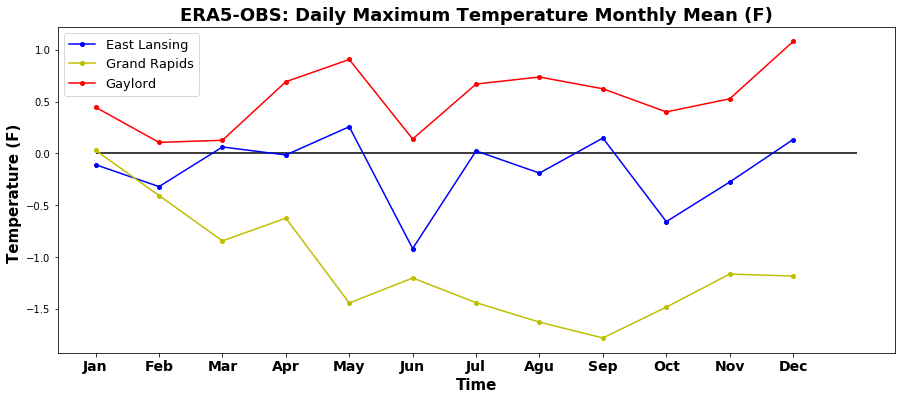

In [57]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), t_daymax_diff_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymax_diff_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymax_diff_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 13, 'k', lw=1.5)
plt.xticks(np.arange(1, 13, step=1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14,fontweight='bold')
plt.xlabel('Time', fontsize=15,fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize=15,fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'], fontsize=13)
plt.title('ERA5-OBS: Daily Maximum Temperature Monthly Mean (F)', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/temp_daymaxmon_diff.png')

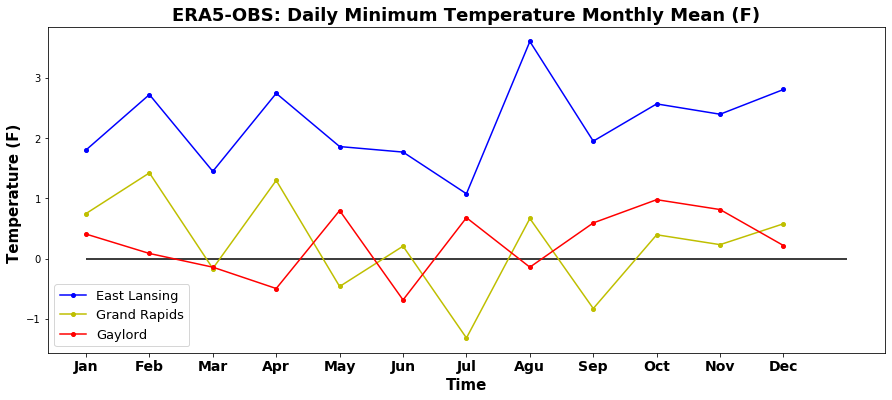

In [58]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), t_daymin_diff_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymin_diff_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymin_diff_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 13, 'k', lw=1.5)
plt.xticks(np.arange(1, 13, step=1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14,fontweight='bold')
plt.xlabel('Time', fontsize=15,fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize=15,fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'], fontsize=13)
plt.title('ERA5-OBS: Daily Minimum Temperature Monthly Mean (F)', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/temp_dayminmon_diff.png')

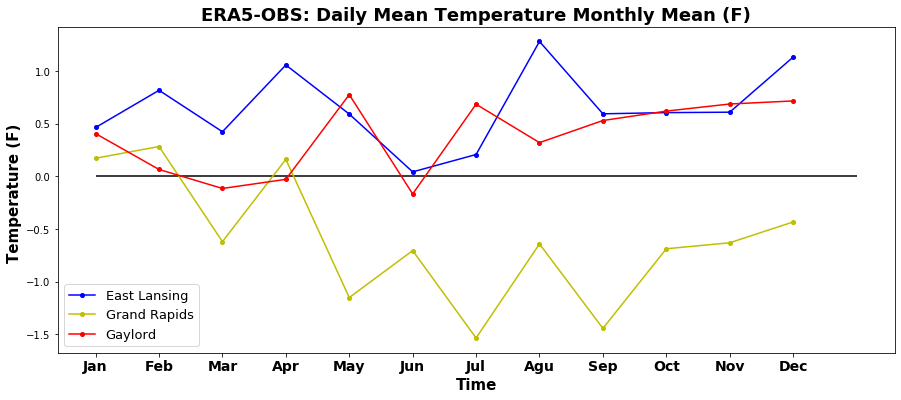

In [59]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), t_daymean_diff_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymean_diff_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), t_daymean_diff_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 13, 'k', lw=1.5)
plt.xticks(np.arange(1, 13, step=1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14,fontweight='bold')
plt.xlabel('Time', fontsize=15,fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize=15,fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'], fontsize=13)
plt.title('ERA5-OBS: Daily Mean Temperature Monthly Mean (F)', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/temp_daymeanmon_diff.png')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


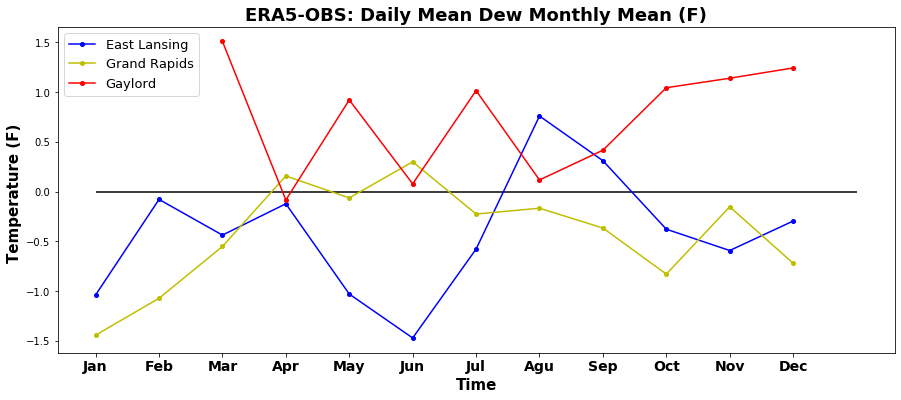

In [60]:
dew_daymean_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['dew'].mean()
dew_daymean_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['dew'].mean()

dew_daymean_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['dew'].mean()
dew_daymean_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['dew'].mean()

dew_daymean_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['dew'].mean()
dew_daymean_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['dew'].mean()

eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_el = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
             'dew_daymean_diff_el':np.array(dew_daymean_era_el-dew_daymean_obs_el)})
mdiff_el = mdiff_el.astype(float)
dew_daymean_diff_el = np.nanmean(np.array(mdiff_el.groupby([mdiff_el.YEAR,mdiff_el.MONTH])['dew_daymean_diff_el'].mean()).reshape((12,-1)), axis=1)

eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_gr = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
             'dew_daymean_diff_gr':np.array(dew_daymean_era_gr-dew_daymean_obs_gr)})
mdiff_gr = mdiff_gr.astype(float)
dew_daymean_diff_gr = np.nanmean(np.array(mdiff_gr.groupby([mdiff_gr.YEAR,mdiff_gr.MONTH])['dew_daymean_diff_gr'].mean()).reshape((12,-1)), axis=1)

eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
mdiff_gl = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
             'dew_daymean_diff_gl':np.array(dew_daymean_era_gl-dew_daymean_obs_gl)})
mdiff_gl = mdiff_gl.astype(float)
dew_daymean_diff_gl = np.nanmean(np.array(mdiff_gl.groupby([mdiff_gl.YEAR,mdiff_gl.MONTH])['dew_daymean_diff_gl'].mean())[4:].reshape((12,-1)), axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), dew_daymean_diff_el, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), dew_daymean_diff_gr, 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,13)), dew_daymean_diff_gl, 'r-o', lw=1.5, ms=4)
plt.hlines(0, 1, 13, 'k', lw=1.5)
plt.xticks(np.arange(1, 13, step=1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14,fontweight='bold')
plt.xlabel('Time', fontsize=15,fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize=15,fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'], fontsize=13)
plt.title('ERA5-OBS: Daily Mean Dew Monthly Mean (F)', fontsize=18,fontweight='bold')
plt.savefig('./plot/Summary/dew_daymeanmon_diff.png')

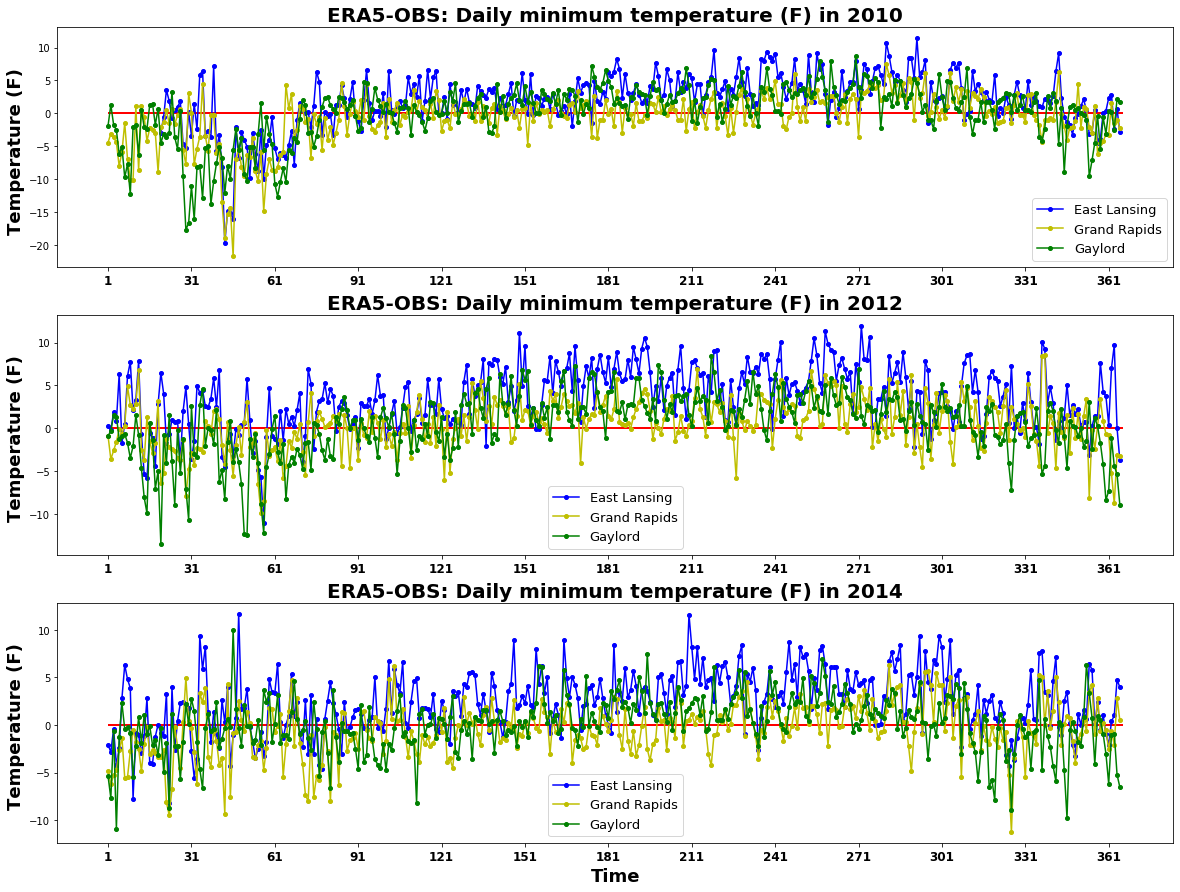

In [121]:
plt.subplots(3,1,figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(list(range(1,366)), t_daymin_era_el[3652-365:3652]-t_daymin_obs_el[3652-365:3652], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gr[3652-365:3652]-t_daymin_obs_gr[3652-365:3652], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gl[835:835+365]-t_daymin_obs_gl[835:835+365], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2010', fontsize = 20, fontweight='bold')

plt.subplot(3,1,2)
plt.plot(list(range(1,366)), t_daymin_era_el[3652+365:3652+365*2]-t_daymin_obs_el[3652+365:3652+365*2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gr[3652+365:3652+365*2]-t_daymin_obs_gr[3652+365:3652+365*2], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gl[835+365*2:835+365*3]-t_daymin_obs_gl[835+365*2:835+365*3], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2012', fontsize = 20, fontweight='bold')

plt.subplot(3,1,3)
plt.plot(list(range(1,366)), t_daymin_era_el[3652+365*3:3652+365*4]-t_daymin_obs_el[3652+365*3:3652+365*4], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gr[3652+365*3:3652+365*4]-t_daymin_obs_gr[3652+365*3:3652+365*4], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_gl[835+365*4:835+365*5]-t_daymin_obs_gl[835+365*4:835+365*5], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Lansing', 'Grand Rapids', 'Gaylord'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2014', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/1yr_mindiff.png')

In [120]:
df_ele = pd.read_csv('./observation/East Leland 5 min.csv')
df_sh = pd.read_csv('./observation/South Haven 5 min_crc.csv')
era_ele = pd.read_csv('./extracted/East_Leland/East_Leland_9km.csv')
era_sh = pd.read_csv('./extracted/South_Haven/South_Haven_9km.csv')
df_ele = df_ele[:-6]
era_ele = era_ele[20424:]
df_sh = df_sh[:-6]
era_sh = era_sh[46104:]
df_tvc = pd.read_csv('observation/ASOS Traverse City_crc_1.csv')
era_tvc = pd.read_csv('extracted/TVC/TVC_9km.csv')[:-19]
df_ele = df_ele.reset_index(drop=True)
df_sh = df_sh.reset_index(drop=True)
df_tvc = df_tvc.reset_index(drop=True)
era_ele = era_ele.reset_index(drop=True)
era_sh = era_sh.reset_index(drop=True)
era_tvc = era_tvc.reset_index(drop=True)

In [121]:
len(df_tvc) - len(era_tvc)

0

In [112]:
df_tvc['index'] = pd.to_datetime(df_tvc['index'])
dff = df_tvc['index']
year = list(pd.DatetimeIndex(dff).year)
mon = list(pd.DatetimeIndex(dff).month)
day = list(pd.DatetimeIndex(dff).day)
hour = list(pd.DatetimeIndex(dff).hour)
df_tvc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':df_tvc.tmpf, 'relh':df_tvc.relh, 'dew':df_tvc.dwpf})

In [113]:
t_daymax_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].max()
t_daymax_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].max()

t_daymax_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].max()
t_daymax_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].max()

t_daymax_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].max()
t_daymax_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].max()

t_daymin_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].min()
t_daymin_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].min()

t_daymin_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].min()
t_daymin_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].min()

t_daymin_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].min()
t_daymin_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].min()
# t_daymin_obs_tvc = np.insert(np.array(t_daymin_obs_tvc),2449,np.nan)

In [193]:
# set(t_daymin_era_tvc.index) - set(t_daymin_obs_tvc.index)
# t_daymin_obs_tvc.index[2449]

{(2007, 9, 16)}

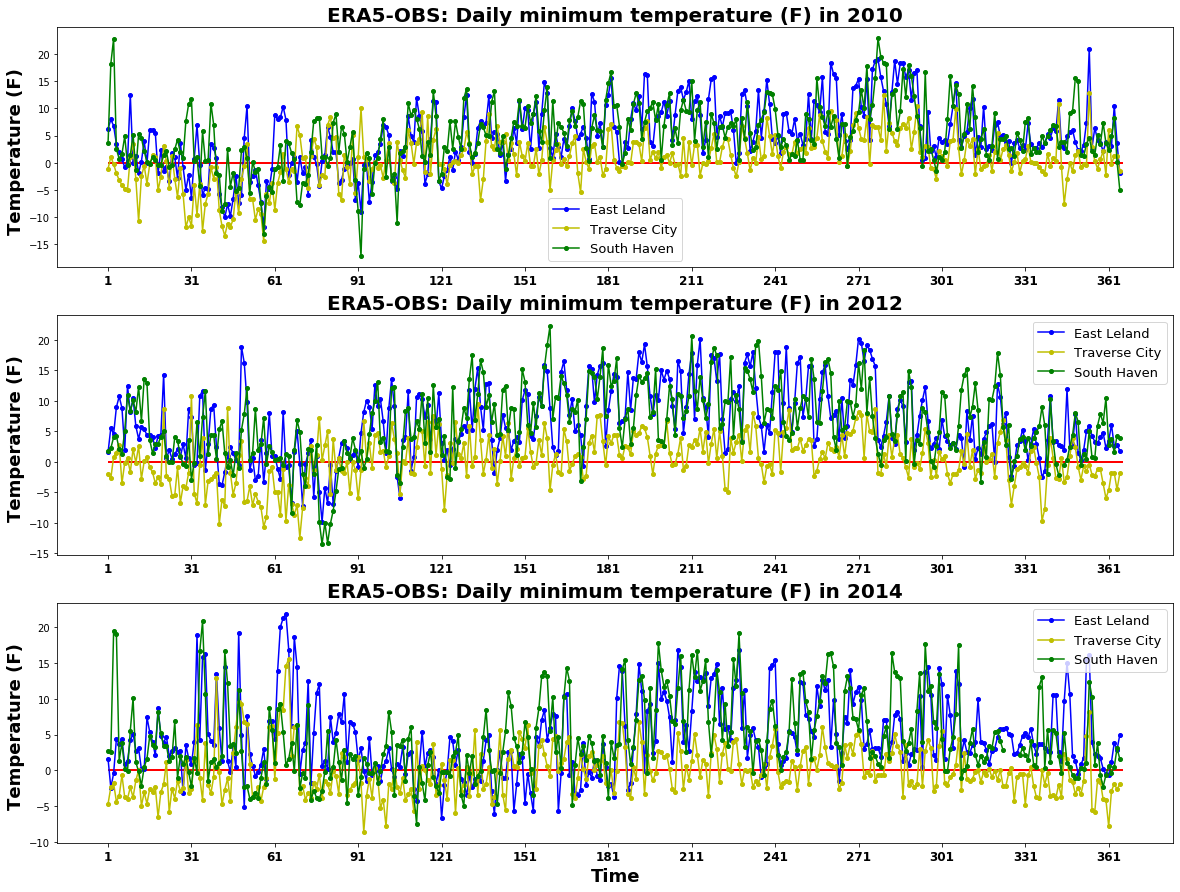

In [5]:
plt.subplots(3,1,figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(list(range(1,366)), t_daymin_era_ele[3652-365-851:3652-851]-t_daymin_obs_ele[3652-365-851:3652-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_tvc[3652-365:3652]-t_daymin_obs_tvc[3652-365:3652], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_sh[3652-365-1921:3652-1921]-t_daymin_obs_sh[3652-365-1921:3652-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2010', fontsize = 20, fontweight='bold')

plt.subplot(3,1,2)
plt.plot(list(range(1,366)), t_daymin_era_ele[3652+365-851:3652+365*2-851]-t_daymin_obs_ele[3652+365-851:3652+365*2-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_tvc[3652+365:3652+365*2]-t_daymin_obs_tvc[3652+365:3652+365*2], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_sh[3652-365+365*2-1921:3652-365+365*3-1921]-t_daymin_obs_sh[3652-365+365*2-1921:3652-365+365*3-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2012', fontsize = 20, fontweight='bold')

plt.subplot(3,1,3)
plt.plot(list(range(1,366)), t_daymin_era_ele[3652+365*3-851:3652+365*4-851]-t_daymin_obs_ele[3652+365*3-851:3652+365*4-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_tvc[3652+365*3:3652+365*4]-t_daymin_obs_tvc[3652+365*3:3652+365*4], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymin_era_sh[3652-365+365*4-1921:3652-365+365*5-1921]-t_daymin_obs_sh[3652-365+365*4-1921:3652-365+365*5-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature (F) in 2014', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/1yr_mindiff2.png')

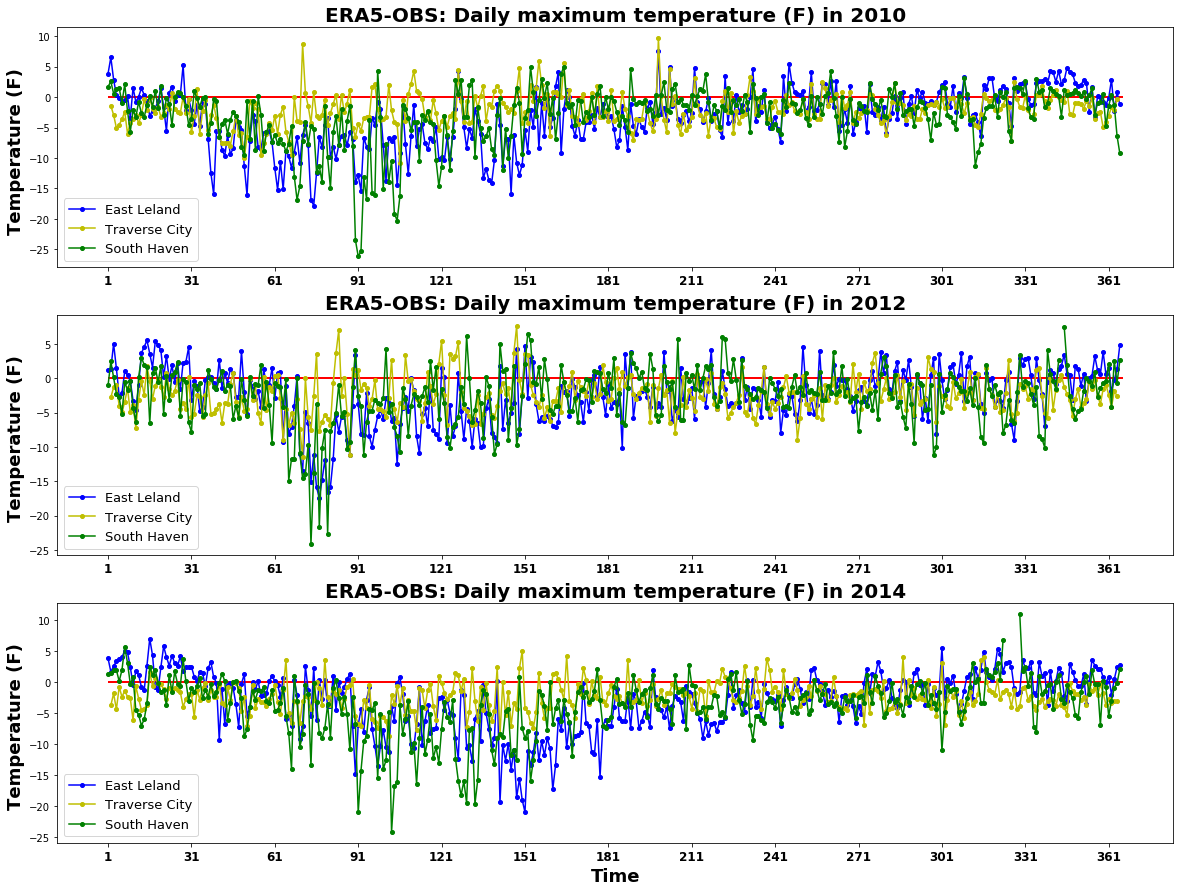

In [20]:
plt.subplots(3,1,figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(list(range(1,366)), t_daymax_era_ele[3652-365-851:3652-851]-t_daymax_obs_ele[3652-365-851:3652-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_tvc[3652-365:3651]-t_daymax_obs_tvc[3652-365:3651], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_sh[3652-365-1921:3652-1921]-t_daymax_obs_sh[3652-365-1921:3652-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily maximum temperature (F) in 2010', fontsize = 20, fontweight='bold')

plt.subplot(3,1,2)
plt.plot(list(range(1,366)), t_daymax_era_ele[3652+365-851:3652+365*2-851]-t_daymax_obs_ele[3652+365-851:3652+365*2-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_tvc[3652+365:3651+365*2]-t_daymax_obs_tvc[3652+365:3651+365*2], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_sh[3652-365+365*2-1921:3652-365+365*3-1921]-t_daymax_obs_sh[3652-365+365*2-1921:3652-365+365*3-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
# plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily maximum temperature (F) in 2012', fontsize = 20, fontweight='bold')

plt.subplot(3,1,3)
plt.plot(list(range(1,366)), t_daymax_era_ele[3652+365*3-851:3652+365*4-851]-t_daymax_obs_ele[3652+365*3-851:3652+365*4-851], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_tvc[3652+365*3:3651+365*4]-t_daymax_obs_tvc[3652+365*3:3651+365*4], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(1,366)), t_daymax_era_sh[3652-365+365*4-1921:3652-365+365*5-1921]-t_daymax_obs_sh[3652-365+365*4-1921:3652-365+365*5-1921], 'g-o', lw=1.5, ms=4)

plt.hlines(0, 1, 366, 'r', lw=2)
plt.xticks(np.arange(1, 366, step=30), fontsize = 12, fontweight='bold')
plt.xlabel('Time', fontsize = 18, fontweight='bold')
plt.ylabel('Temperature (F) ', fontsize = 18, fontweight='bold')
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily maximum temperature (F) in 2014', fontsize = 20, fontweight='bold')
plt.savefig('./plot/Summary/1yr_maxdiff2.png')

In [18]:
t_daymax_era_tvc

YEAR  MONTH  DAY
2001  1      1      18.855259
             2      23.921357
             3      22.228145
             4      29.468657
             5      33.074644
                      ...    
2018  12     26     33.445131
             27     44.691395
             28     47.673442
             29     24.291514
             30     31.829371
Name: atmp, Length: 6573, dtype: float64

In [5]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')

mdiff_ele = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff_el':np.array(t_daymax_era_ele-t_daymax_obs_ele),
             't_daymin_diff_el':np.array(t_daymin_era_ele-t_daymin_obs_ele)})
mdiff_ele = mdiff_ele.astype(float)
t_daymax_diff_ele = np.array(mdiff_ele.groupby([mdiff_ele.YEAR,mdiff_ele.MONTH])['t_daymax_diff_el'].mean())
t_daymin_diff_ele = np.array(mdiff_ele.groupby([mdiff_ele.YEAR,mdiff_ele.MONTH])['t_daymin_diff_el'].mean())

In [6]:
dff = pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')

mdiff_sh = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(t_daymax_era_sh-t_daymax_obs_sh),
             't_daymin_diff':np.array(t_daymin_era_sh-t_daymin_obs_sh)})
mdiff_sh = mdiff_sh.astype(float)
t_daymax_diff_sh = np.array(mdiff_sh.groupby([mdiff_sh.YEAR,mdiff_sh.MONTH])['t_daymax_diff'].mean())
t_daymin_diff_sh = np.array(mdiff_sh.groupby([mdiff_sh.YEAR,mdiff_sh.MONTH])['t_daymin_diff'].mean())

In [7]:
dff = pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')

mdiff_tvc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(t_daymax_era_tvc-t_daymax_obs_tvc),
             't_daymin_diff':np.array(t_daymin_era_tvc-t_daymin_obs_tvc)})
mdiff_tvc = mdiff_tvc.astype(float)
t_daymax_diff_tvc = np.array(mdiff_tvc.groupby([mdiff_tvc.YEAR,mdiff_tvc.MONTH])['t_daymax_diff'].mean())
t_daymin_diff_tvc = np.array(mdiff_tvc.groupby([mdiff_tvc.YEAR,mdiff_tvc.MONTH])['t_daymin_diff'].mean())

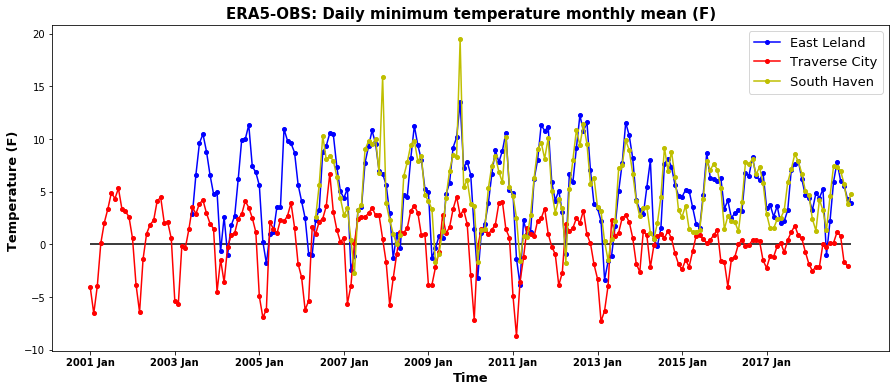

In [14]:
plt.figure(figsize=(15,6))
plt.plot(list(range(30,218)), t_daymin_diff_ele, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_tvc, 'r-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_sh, 'y-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/temp_min_mondiff2.png')

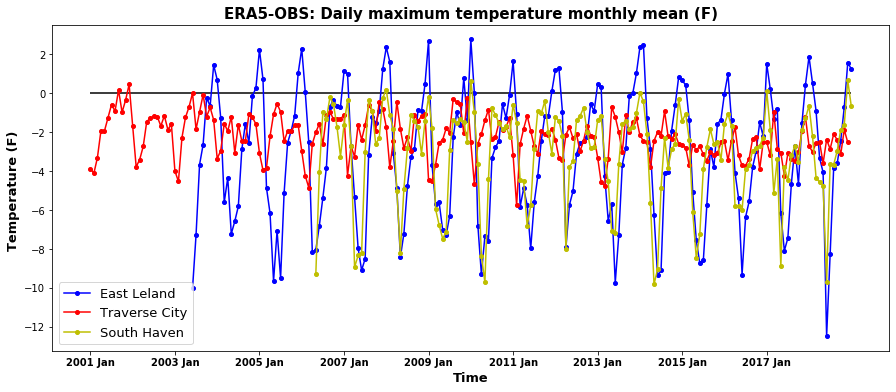

In [10]:
plt.figure(figsize=(15,6))
plt.plot(list(range(30,218)), t_daymax_diff_ele, 'b-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_tvc, 'r-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_sh, 'y-o', lw=1.5, ms=4)
plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Leland', 'Traverse City', 'South Haven'],fontsize = 13)
plt.title('ERA5-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/temp_max_mondiff2.png')

In [114]:
l_ele = t_daymin_obs_ele.shape[0]
l_sh = t_daymin_obs_sh.shape[0]
l_tvc = t_daymin_obs_tvc.shape[0]
ratioc_ele = np.zeros((l_ele,5))*np.nan
ratioc_sh = np.zeros((l_sh,5))*np.nan
ratioc_tvc = np.zeros((l_tvc,5))*np.nan
ratioc = [ratioc_ele, ratioc_sh, ratioc_tvc]
ratioobs = [ratioc_ele, ratioc_sh, ratioc_tvc]
ratioera = [ratioc_ele, ratioc_sh, ratioc_tvc]
l = [l_ele, l_sh, l_tvc]
t_daymin_obs = [np.array(t_daymin_obs_ele), np.array(t_daymin_obs_sh), np.array(t_daymin_obs_tvc)]
t_daymin_era = [np.array(t_daymin_era_ele), np.array(t_daymin_era_sh), np.array(t_daymin_era_tvc)]
for i in range(3):
    for j in range(l[i]):
        if np.logical_and((t_daymin_obs[i][j] <= 32),(t_daymin_obs[i][j] > 23)):
            t_daymin_obs[i][j] = 1
        elif np.logical_and((t_daymin_obs[i][j] <= 23),(t_daymin_obs[i][j] > 14)):
            t_daymin_obs[i][j] = 2
        elif np.logical_and((t_daymin_obs[i][j] <= 14),(t_daymin_obs[i][j] > 5)):
            t_daymin_obs[i][j] = 3
        elif np.logical_and((t_daymin_obs[i][j] <= 5),(t_daymin_obs[i][j] > -4)):
            t_daymin_obs[i][j] = 4
        elif np.logical_and((t_daymin_obs[i][j] <= -4),(t_daymin_obs[i][j] > -13)):
            t_daymin_obs[i][j] = 5
        else:
            t_daymin_obs[i][j] = np.nan
            
        if np.logical_and((t_daymin_era[i][j] <= 32),(t_daymin_era[i][j] > 23)):
            t_daymin_era[i][j] = 1
        elif np.logical_and((t_daymin_era[i][j] <= 23),(t_daymin_era[i][j] > 14)):
            t_daymin_era[i][j] = 2
        elif np.logical_and((t_daymin_era[i][j] <= 14),(t_daymin_era[i][j] > 5)):
            t_daymin_era[i][j] = 3
        elif np.logical_and((t_daymin_era[i][j] <= 5),(t_daymin_era[i][j] > -4)):
            t_daymin_era[i][j] = 4
        elif np.logical_and((t_daymin_era[i][j] <= -4),(t_daymin_era[i][j] > -13)):
            t_daymin_era[i][j] = 5
        else:
            t_daymin_era[i][j] = np.nan

        
for i in range(3):
    for j in range(5):
        ratioc[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(t_daymin_era[i][:] == j+1)), 1.0, ratioc[i][:,j])
        ratioc[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(t_daymin_era[i][:] != j+1)), 0.0, ratioc[i][:,j])


In [115]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_ele = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[0][:,0],
                         '-10~-5':ratioc[0][:,1],
                         '-15~-10':ratioc[0][:,2],
                         '-20~-15':ratioc[0][:,3],
                         '-25~-20':ratioc[0][:,4]})
ratiotc_ele.to_csv('ratiotc_ele.csv')
# ratiotc_ele
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[0][:]}).groupby(ratiotc_ele.MONTH)['a'].value_counts()
a.to_csv('./summary/ele_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[0][:]}).groupby(ratiotc_ele.MONTH)['a'].value_counts()
a.to_csv('./summary/ele_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [116]:
dff = pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_sh = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[1][:,0],
                         '-10~-5':ratioc[1][:,1],
                         '-15~-10':ratioc[1][:,2],
                         '-20~-15':ratioc[1][:,3],
                         '-25~-20':ratioc[1][:,4]})
ratiotc_sh.to_csv('ratiotc_sh.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[1][:]}).groupby(ratiotc_sh.MONTH)['a'].value_counts()
a.to_csv('./summary/sh_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[1][:]}).groupby(ratiotc_sh.MONTH)['a'].value_counts()
a.to_csv('./summary/sh_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app


In [117]:
dff = pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
ratiotc_tvc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[2][:,0],
                         '-10~-5':ratioc[2][:,1],
                         '-15~-10':ratioc[2][:,2],
                         '-20~-15':ratioc[2][:,3],
                         '-25~-20':ratioc[2][:,4]})
ratiotc_tvc.to_csv('ratiotc_tvc.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_obs[2][:]}).groupby(ratiotc_tvc.MONTH)['a'].value_counts()
a.to_csv('./summary/tvc_category_obs.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':t_daymin_era[2][:]}).groupby(ratiotc_tvc.MONTH)['a'].value_counts()
a.to_csv('./summary/tvc_category_era.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app


In [118]:
ratiotca_ele = pd.DataFrame({
                         '-5~0':ratiotc_ele.groupby(ratiotc_ele.MONTH)['-5~0'].sum() / ratiotc_ele.groupby(ratiotc_ele.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_ele.groupby(ratiotc_ele.MONTH)['-10~-5'].sum() / ratiotc_ele.groupby(ratiotc_ele.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_ele.groupby(ratiotc_ele.MONTH)['-15~-10'].sum() / ratiotc_ele.groupby(ratiotc_ele.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_ele.groupby(ratiotc_ele.MONTH)['-20~-15'].sum() / ratiotc_ele.groupby(ratiotc_ele.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_ele.groupby(ratiotc_ele.MONTH)['-25~-20'].sum() / ratiotc_ele.groupby(ratiotc_ele.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_ele.groupby(ratiotc_ele.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_ele.to_csv('ratiotca_ele.csv')
ratiotca_ele

-5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
MONTH                                                                  
1      0.745455  0.629139  0.467742  0.333333  0.000000       82/110   
10     0.000000  0.000000       NaN       NaN       NaN         0/82   
11     0.309278  0.215686  0.000000       NaN       NaN       60/194   
12     0.682051  0.305882  0.254902  0.181818       NaN      133/195   
2      0.685185  0.555556  0.530973  0.254545  0.363636       74/108   
3      0.774390  0.547826  0.381818  0.102564  0.000000      127/164   
4      0.540984  0.333333  0.000000  0.000000       NaN       99/183   
5      0.000000  0.000000       NaN       NaN       NaN         0/60   
6      0.000000       NaN       NaN       NaN       NaN          0/5   
7           NaN       NaN       NaN       NaN       NaN          0/0   
8           NaN       NaN       NaN       NaN       NaN          0/0   
9      0.000000       NaN       NaN       NaN       NaN          0/4   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1             95/151          58/124           15/45             0/6  
10               0/1             0/0             0/0             0/0  
11             11/51             0/5             0/0             0/0  
12            52/170           13/51            2/11             0/0  
2             65/117          60/113           14/55            4/11  
3             63/115           21/55            4/39             0/9  
4              16/48             0/5             0/1             0/0  
5                0/2             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [119]:
ratiotca_sh = pd.DataFrame({
                         '-5~0':ratiotc_sh.groupby(ratiotc_sh.MONTH)['-5~0'].sum() / ratiotc_sh.groupby(ratiotc_sh.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_sh.groupby(ratiotc_sh.MONTH)['-10~-5'].sum() / ratiotc_sh.groupby(ratiotc_sh.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_sh.groupby(ratiotc_sh.MONTH)['-15~-10'].sum() / ratiotc_sh.groupby(ratiotc_sh.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_sh.groupby(ratiotc_sh.MONTH)['-20~-15'].sum() / ratiotc_sh.groupby(ratiotc_sh.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_sh.groupby(ratiotc_sh.MONTH)['-25~-20'].sum() / ratiotc_sh.groupby(ratiotc_sh.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_sh.groupby(ratiotc_sh.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_sh.to_csv('ratiotca_sh.csv')
ratiotca_sh

-5~0    -10~-5   -15~-10   -20~-15  -25~-20 -5~0_era/obs  \
MONTH                                                                 
1      0.828571  0.548673  0.452055  0.263158      0.0       87/105   
10     0.000000       NaN       NaN       NaN      NaN         0/30   
11     0.196850  0.080000  0.000000  0.000000      NaN       25/127   
12     0.623529  0.293478  0.250000  0.000000      NaN      106/170   
2      0.770000  0.707865  0.544304  0.411765      0.0       77/100   
3      0.740741  0.465116  0.523810  0.000000      0.0      100/135   
4      0.361702  0.000000       NaN       NaN      NaN        34/94   
5      0.000000       NaN       NaN       NaN      NaN          0/9   
6           NaN       NaN       NaN       NaN      NaN          0/0   
7           NaN       NaN       NaN       NaN      NaN          0/0   
8           NaN       NaN       NaN       NaN      NaN          0/0   
9           NaN       NaN       NaN       NaN      NaN          0/0   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1             62/113           33/73            5/19             0/9  
10               0/0             0/0             0/0             0/0  
11              2/25             0/1             0/1             0/0  
12             27/92            6/24             0/3             0/0  
2              63/89           43/79            7/17             0/7  
3              40/86           11/21             0/4             0/2  
4               0/10             0/0             0/0             0/0  
5                0/0             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [120]:
ratiotca_tvc = pd.DataFrame({
                         '-5~0':ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-5~0'].sum() / ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-10~-5'].sum() / ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-15~-10'].sum() / ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-20~-15'].sum() / ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-25~-20'].sum() / ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(int(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(int(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(int(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(int(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(int(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc_tvc.groupby(ratiotc_tvc.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca_tvc.to_csv('ratiotca_tvc.csv')
ratiotca_tvc

-5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
MONTH                                                                  
1      0.619048  0.725000  0.571429  0.559322  0.666667       91/147   
10     0.076923  0.000000       NaN       NaN       NaN         5/65   
11     0.603604  0.589286  0.250000       NaN       NaN      134/222   
12     0.801843  0.755682  0.692308  0.312500  0.000000      174/217   
2      0.523077  0.449275  0.453237  0.589286  0.461538       68/130   
3      0.630435  0.546763  0.605263  0.607143  0.444444      116/184   
4      0.660633  0.685714  0.333333  0.000000       NaN      146/221   
5      0.214286       NaN       NaN       NaN       NaN         9/42   
6      0.000000       NaN       NaN       NaN       NaN          0/1   
7           NaN       NaN       NaN       NaN       NaN          0/0   
8           NaN       NaN       NaN       NaN       NaN          0/0   
9      0.000000       NaN       NaN       NaN       NaN          0/2   

      -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
MONTH                                                                 
1            116/160          80/140           33/59             6/9  
10               0/2             0/0             0/0             0/0  
11             33/56             1/4             0/0             0/0  
12           133/176           36/52            5/16             0/3  
2             62/138          63/139           33/56            6/13  
3             76/139           46/76           17/28             4/9  
4              24/35             1/3             0/1             0/0  
5                0/0             0/0             0/0             0/0  
6                0/0             0/0             0/0             0/0  
7                0/0             0/0             0/0             0/0  
8                0/0             0/0             0/0             0/0  
9                0/0             0/0             0/0             0/0

In [149]:
era = pd.read_csv('./summary/el_category_era.csv', header=None)
era = era.astype(float).sort_index(axis=1)
era

0    1      2
0    1.0  1.0  152.0
1    1.0  2.0  118.0
2    1.0  3.0  116.0
3    1.0  4.0   77.0
4    1.0  5.0   37.0
5   10.0  1.0   15.0
6   11.0  1.0  181.0
7   11.0  2.0   38.0
8   11.0  3.0    5.0
9   11.0  4.0    1.0
10  12.0  1.0  233.0
11  12.0  2.0  141.0
12  12.0  3.0   52.0
13  12.0  4.0   24.0
14  12.0  5.0    5.0
15   2.0  2.0  127.0
16   2.0  1.0  124.0
17   2.0  3.0  123.0
18   2.0  4.0   68.0
19   2.0  5.0   22.0
20   3.0  1.0  225.0
21   3.0  2.0  115.0
22   3.0  3.0   55.0
23   3.0  4.0   20.0
24   3.0  5.0    3.0
25   4.0  1.0  124.0
26   4.0  2.0    8.0
27   5.0  1.0    4.0

In [180]:
erat = np.zeros((12,5))
for j in range(5):
    a = [set(era.loc[era[0]==i+1].loc[era[1]==float(j+1)][2]) for i in range(12)]
    for i in range(12):
        if a[i] == set():
            a[i] = 0
        else:
            a[i] = a[i].pop()
    erat[:,j] = a
erat

array([[152., 118., 116.,  77.,  37.],
       [124., 127., 123.,  68.,  22.],
       [225., 115.,  55.,  20.,   3.],
       [124.,   8.,   0.,   0.,   0.],
       [  4.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [ 15.,   0.,   0.,   0.,   0.],
       [181.,  38.,   5.,   1.,   0.],
       [233., 141.,  52.,  24.,   5.]])

In [195]:
ratiotca = pd.read_csv('./summary/ratiotca_el.csv')
tca = ratiotca.iloc[1:4]
ratiotca = ratiotca.drop([1,2,3])
ratiotca = ratiotca.append(tca)
ratiotca = ratiotca.reset_index(drop=True)
obst = np.zeros((12,5))
for i in range(12):
    obst[i,0] = float(ratiotca_el['-5~0_era/obs'][i].split('/')[1])
    obst[i,1] = float(ratiotca_el['-10~-5_era/obs'][i].split('/')[1])
    obst[i,2] = float(ratiotca_el['-15~-10_era/obs'][i].split('/')[1])
    obst[i,3] = float(ratiotca_el['-20~-15_era/obs'][i].split('/')[1])
    obst[i,4] = float(ratiotca_el['-25~-20_era/obs'][i].split('/')[1])
erata = pd.DataFrame({
                 '-5~0':erat[:,0] / obst[:,0],
                 '-10~-5':erat[:,1] / obst[:,1],
                 '-15~-10':erat[:,2] / obst[:,2],
                 '-20~-15':erat[:,3] / obst[:,3],
                 '-25~-20':erat[:,4] / obst[:,4],
                 '-5~0_era/obs':[str(erat[i,0])+ '/'+ str(obst[i,0]) for i in range(12)],
                 '-10~-5_era/obs':[str(erat[i,1])+ '/'+ str(obst[i,1]) for i in range(12)],
                 '-15~-10_era/obs':[str(erat[i,2])+ '/'+ str(obst[i,2]) for i in range(12)],
                 '-20~-15_era/obs':[str(erat[i,3])+ '/'+ str(obst[i,3]) for i in range(12)],
                 '-25~-20_era/obs':[str(erat[i,4])+ '/'+ str(obst[i,4]) for i in range(12)]
})
erata['MONTH'] = ratiotca['MONTH']

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [204]:
pd.concat([ratiotca,erata],sort=False)

MONTH      -5~0    -10~-5   -15~-10   -20~-15   -25~-20 -5~0_era/obs  \
0       1  0.840909  0.604317  0.669811  0.610390  0.592593      111/132   
1       2  0.704545  0.580882  0.660377  0.633333  0.500000       93/132   
2       3  0.821990  0.550336  0.596491  0.692308  0.666667      157/191   
3       4  0.668874  0.300000       NaN       NaN       NaN      101/151   
4       5  0.214286       NaN       NaN       NaN       NaN         3/14   
5       6       NaN       NaN       NaN       NaN       NaN          0/0   
6       7       NaN       NaN       NaN       NaN       NaN          0/0   
7       8       NaN       NaN       NaN       NaN       NaN          0/0   
8       9       NaN       NaN       NaN       NaN       NaN          0/0   
9      10  0.161290       NaN       NaN       NaN       NaN        15/93   
10     11  0.649485  0.384615  0.500000  1.000000       NaN      126/194   
11     12  0.850000  0.638158  0.452830  0.705882  0.500000      170/200   
0       1  1.151515  0.848921  1.094340  1.000000  1.370370  152.0/132.0   
1       2  0.939394  0.933824  1.160377  1.133333  1.100000  124.0/132.0   
2       3  1.178010  0.771812  0.964912  1.538462  1.000000  225.0/191.0   
3       4  0.821192  0.400000       NaN       NaN       NaN  124.0/151.0   
4       5  0.285714       NaN       NaN       NaN       NaN     4.0/14.0   
5       6       NaN       NaN       NaN       NaN       NaN      0.0/0.0   
6       7       NaN       NaN       NaN       NaN       NaN      0.0/0.0   
7       8       NaN       NaN       NaN       NaN       NaN      0.0/0.0   
8       9       NaN       NaN       NaN       NaN       NaN      0.0/0.0   
9      10  0.161290       NaN       NaN       NaN       NaN    15.0/93.0   
10     11  0.932990  0.487179  0.833333  1.000000       NaN  181.0/194.0   
11     12  1.165000  0.927632  0.981132  1.411765  0.833333  233.0/200.0   

   -10~-5_era/obs -15~-10_era/obs -20~-15_era/obs -25~-20_era/obs  
0          84/139          71/106           47/77           16/27  
1          79/136          70/106           38/60           10/20  
2          82/149           34/57            9/13             2/3  
3            6/20             0/0             0/0             0/0  
4             0/0             0/0             0/0             0/0  
5             0/0             0/0             0/0             0/0  
6             0/0             0/0             0/0             0/0  
7             0/0             0/0             0/0             0/0  
8             0/0             0/0             0/0             0/0  
9             0/0             0/0             0/0             0/0  
10          30/78             3/6             1/1             0/0  
11         97/152           24/53           12/17             3/6  
0     118.0/139.0     116.0/106.0       77.0/77.0       37.0/27.0  
1     127.0/136.0     123.0/106.0       68.0/60.0       22.0/20.0  
2     115.0/149.0       55.0/57.0       20.0/13.0         3.0/3.0  
3        8.0/20.0         0.0/0.0         0.0/0.0         0.0/0.0  
4         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
5         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
6         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
7         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
8         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
9         0.0/0.0         0.0/0.0         0.0/0.0         0.0/0.0  
10      38.0/78.0         5.0/6.0         1.0/1.0         0.0/0.0  
11    141.0/152.0       52.0/53.0       24.0/17.0         5.0/6.0

In [207]:
stations = ['el','gl','gr','ele','sh','tvc']
for s in range(6):
    era = pd.read_csv('./summary/{0}_category_era.csv'.format(stations[s]), header=None)
    era = era.astype(float).sort_index(axis=1)
    erat = np.zeros((12,5))
    for j in range(5):
        a = [set(era.loc[era[0]==i+1].loc[era[1]==float(j+1)][2]) for i in range(12)]
        for i in range(12):
            if a[i] == set():
                a[i] = 0
            else:
                a[i] = a[i].pop()
        erat[:,j] = a

    ratiotca = pd.read_csv('./summary/ratiotca_{0}.csv'.format(stations[s]))
    tca = ratiotca.iloc[1:4]
    ratiotca = ratiotca.drop([1,2,3])
    ratiotca = ratiotca.append(tca)
    ratiotca = ratiotca.reset_index(drop=True)
    obst = np.zeros((12,5))
    for i in range(12):
        obst[i,0] = float(ratiotca['-5~0_era/obs'][i].split('/')[1])
        obst[i,1] = float(ratiotca['-10~-5_era/obs'][i].split('/')[1])
        obst[i,2] = float(ratiotca['-15~-10_era/obs'][i].split('/')[1])
        obst[i,3] = float(ratiotca['-20~-15_era/obs'][i].split('/')[1])
        obst[i,4] = float(ratiotca['-25~-20_era/obs'][i].split('/')[1])
    erata = pd.DataFrame({
                     '-5~0':erat[:,0] / obst[:,0],
                     '-10~-5':erat[:,1] / obst[:,1],
                     '-15~-10':erat[:,2] / obst[:,2],
                     '-20~-15':erat[:,3] / obst[:,3],
                     '-25~-20':erat[:,4] / obst[:,4],
                     '-5~0_era/obs':[str(erat[i,0])+ '/'+ str(obst[i,0]) for i in range(12)],
                     '-10~-5_era/obs':[str(erat[i,1])+ '/'+ str(obst[i,1]) for i in range(12)],
                     '-15~-10_era/obs':[str(erat[i,2])+ '/'+ str(obst[i,2]) for i in range(12)],
                     '-20~-15_era/obs':[str(erat[i,3])+ '/'+ str(obst[i,3]) for i in range(12)],
                     '-25~-20_era/obs':[str(erat[i,4])+ '/'+ str(obst[i,4]) for i in range(12)]
    })
    erata['MONTH'] = ratiotca['MONTH']

    df = pd.concat([ratiotca,erata],sort=False)
    df.to_csv('./summary/table_{0}.csv'.format(stations[s]))

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


In [122]:
df_sh = pd.DataFrame({'YEAR':df_sh.year, 'MONTH':df_sh.month, 'DAY':df_sh.day, 'HOUR':df_sh.hour, 'atmp':df_sh.atmpF})
df_ele = pd.DataFrame({'YEAR':df_ele.year, 'MONTH':df_ele.month, 'DAY':df_ele.day, 'HOUR':df_ele.hour, 'atmp':df_ele.atmp})

In [123]:
obs = [df_el, df_gl, df_gr, df_ele, df_sh, df_tvc]
era = [era_el, era_gl, era_gr, era_ele, era_sh, era_tvc]
    
obs_data = []
era_data = []
for i in range(6):
    obs[i] = obs[i].astype(float)
    era[i] = era[i].astype(float)
    obs[i].MONTH = era[i].MONTH
    for j in range(12):
        obs_data.append(np.array(obs[i].loc[obs[i].MONTH==float(j+1)].atmp))
        era_data.append(np.array(era[i].loc[era[i].MONTH==float(j+1)].atmp))

In [124]:
a = []
b = []
for i in range(72):
    a.append(len(obs_data[i]))
    b.append(len(era_data[i]))
np.array(a) - np.array(b)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

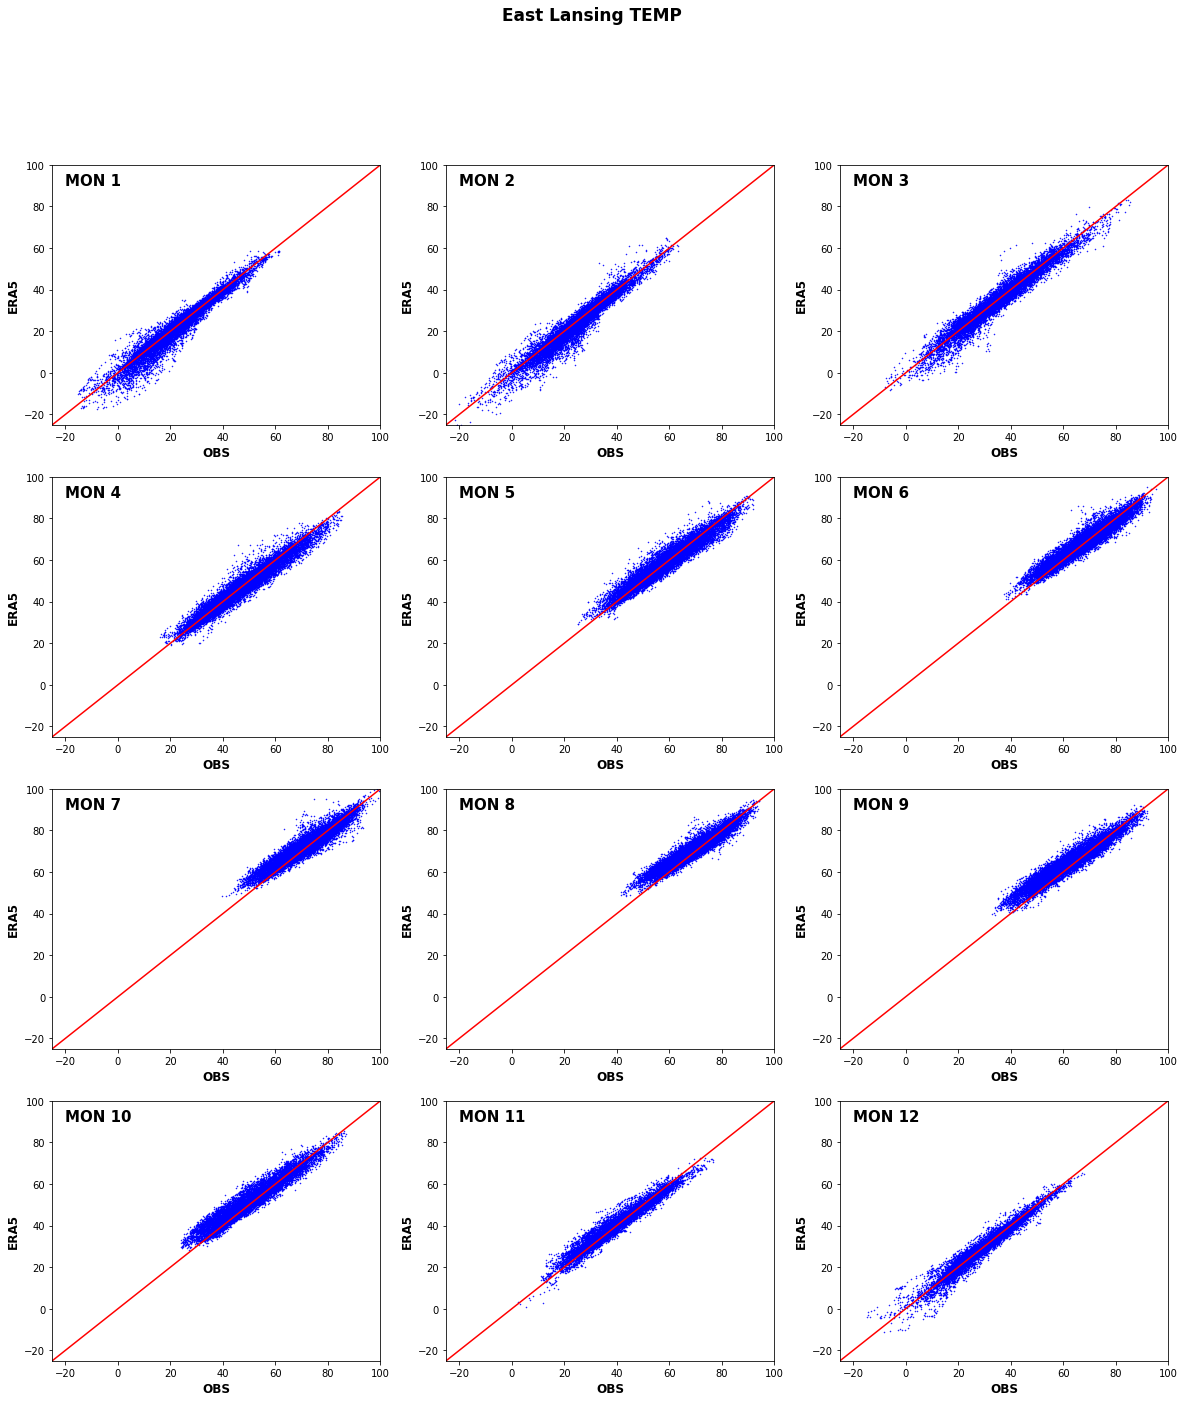

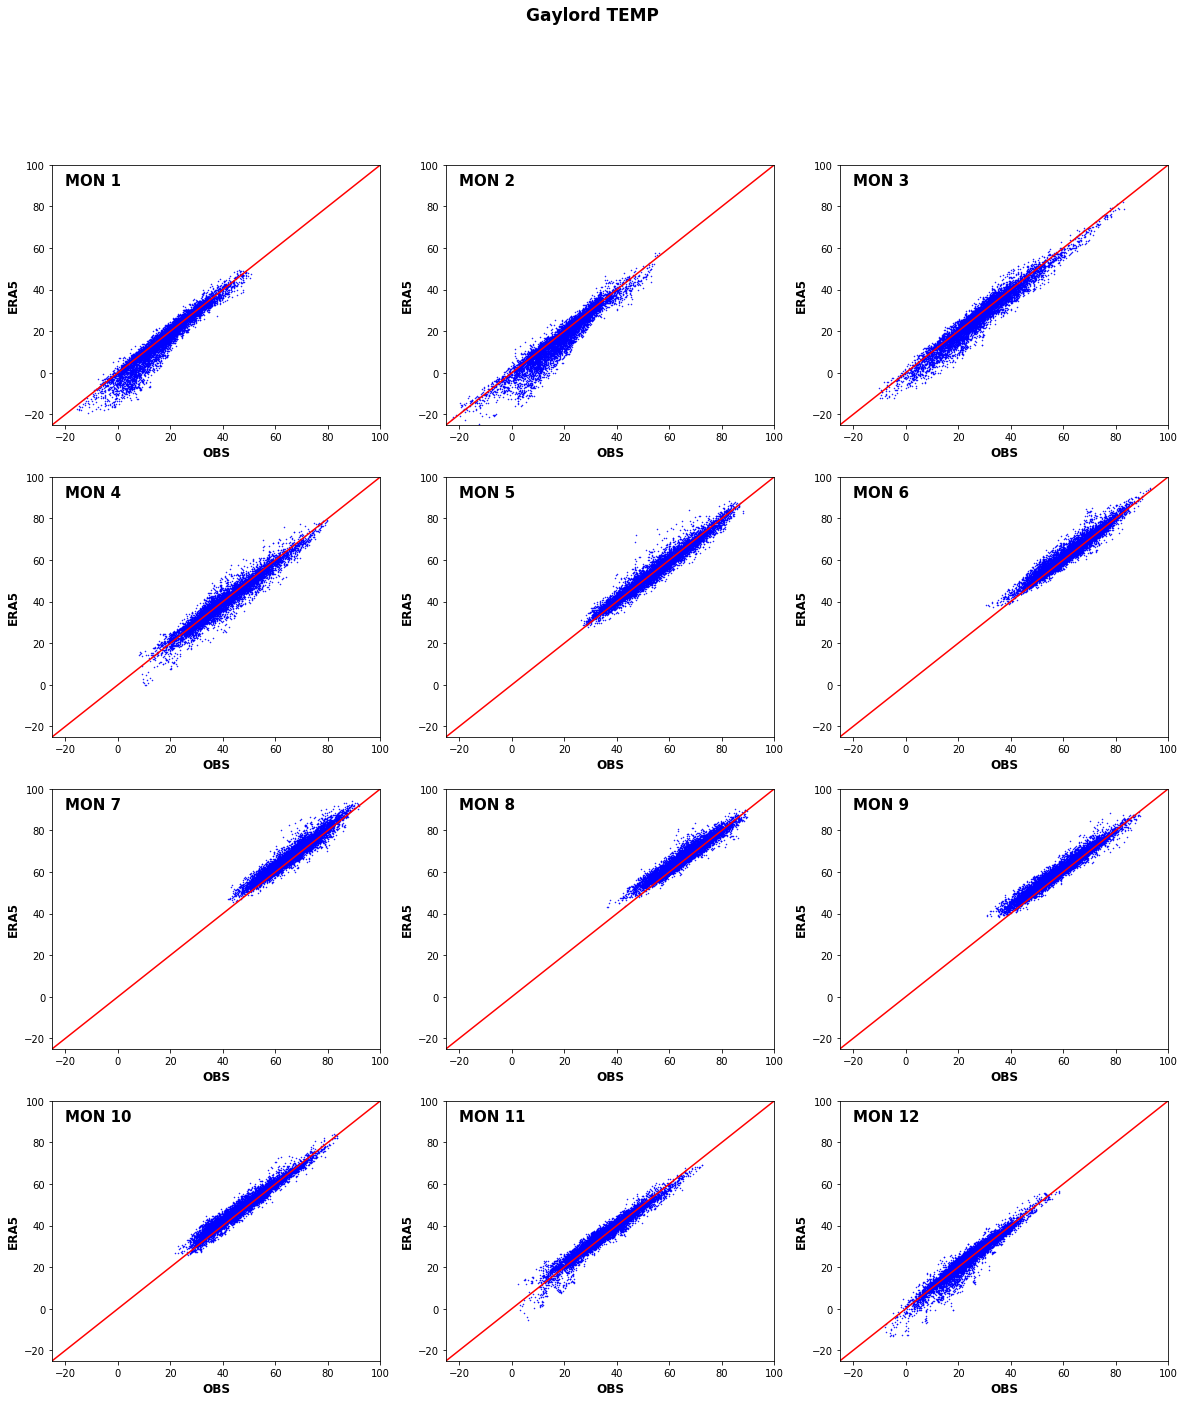

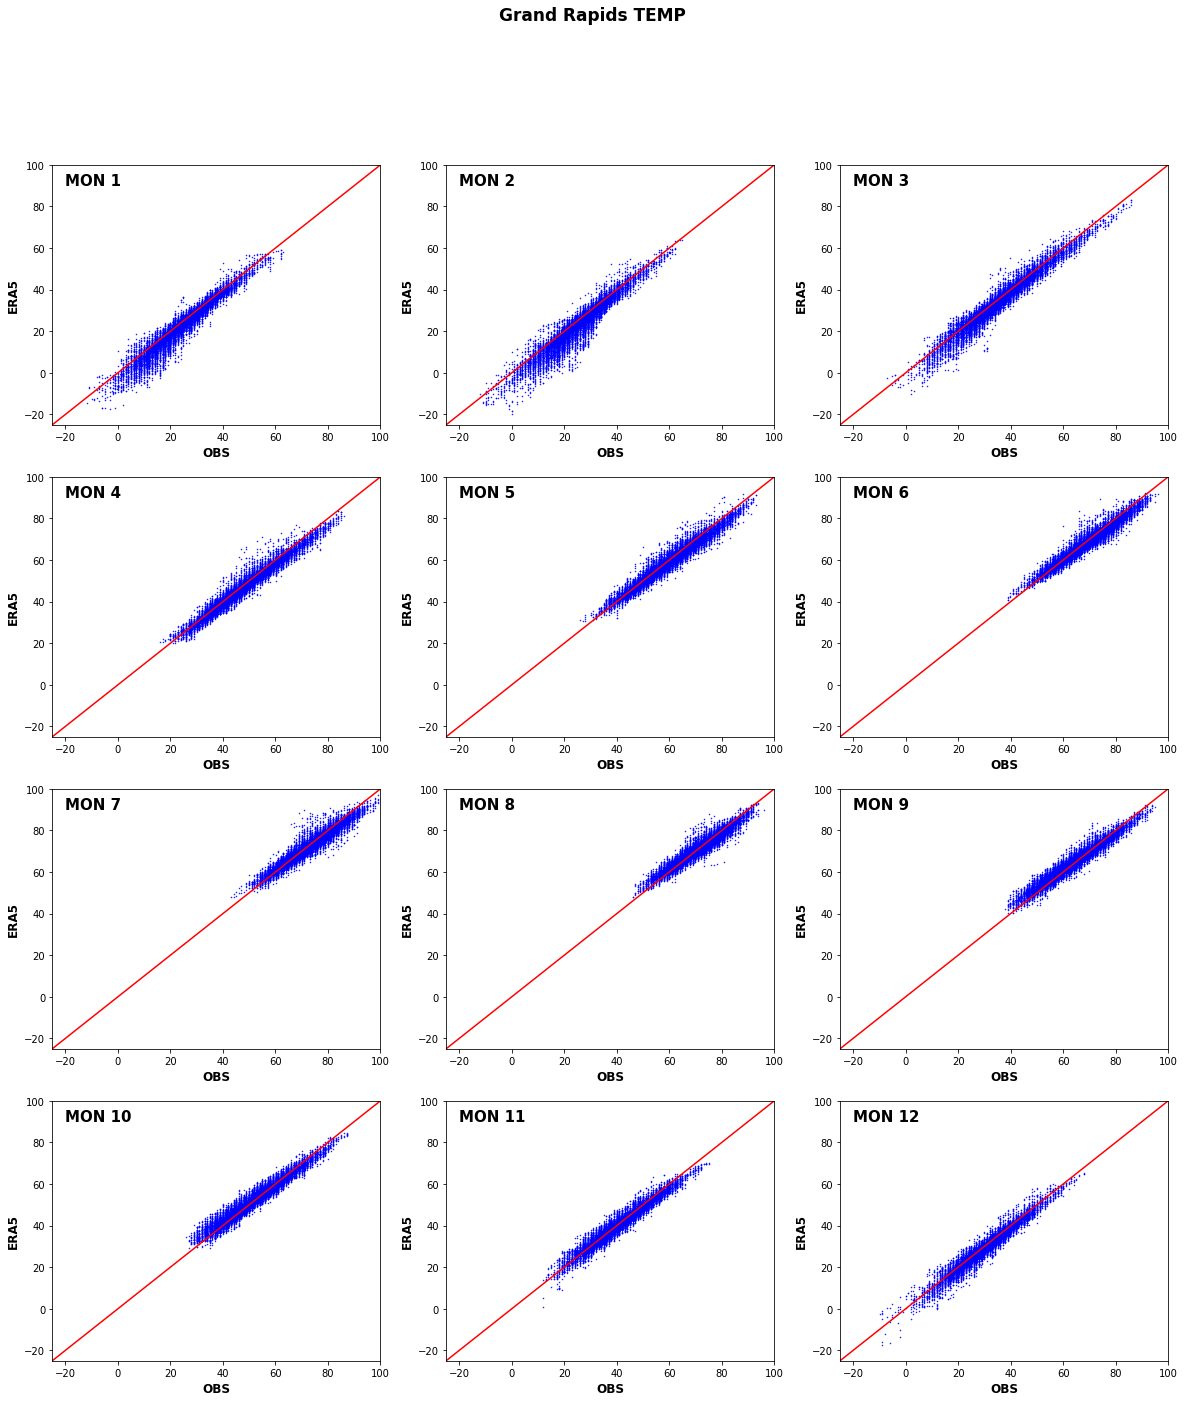

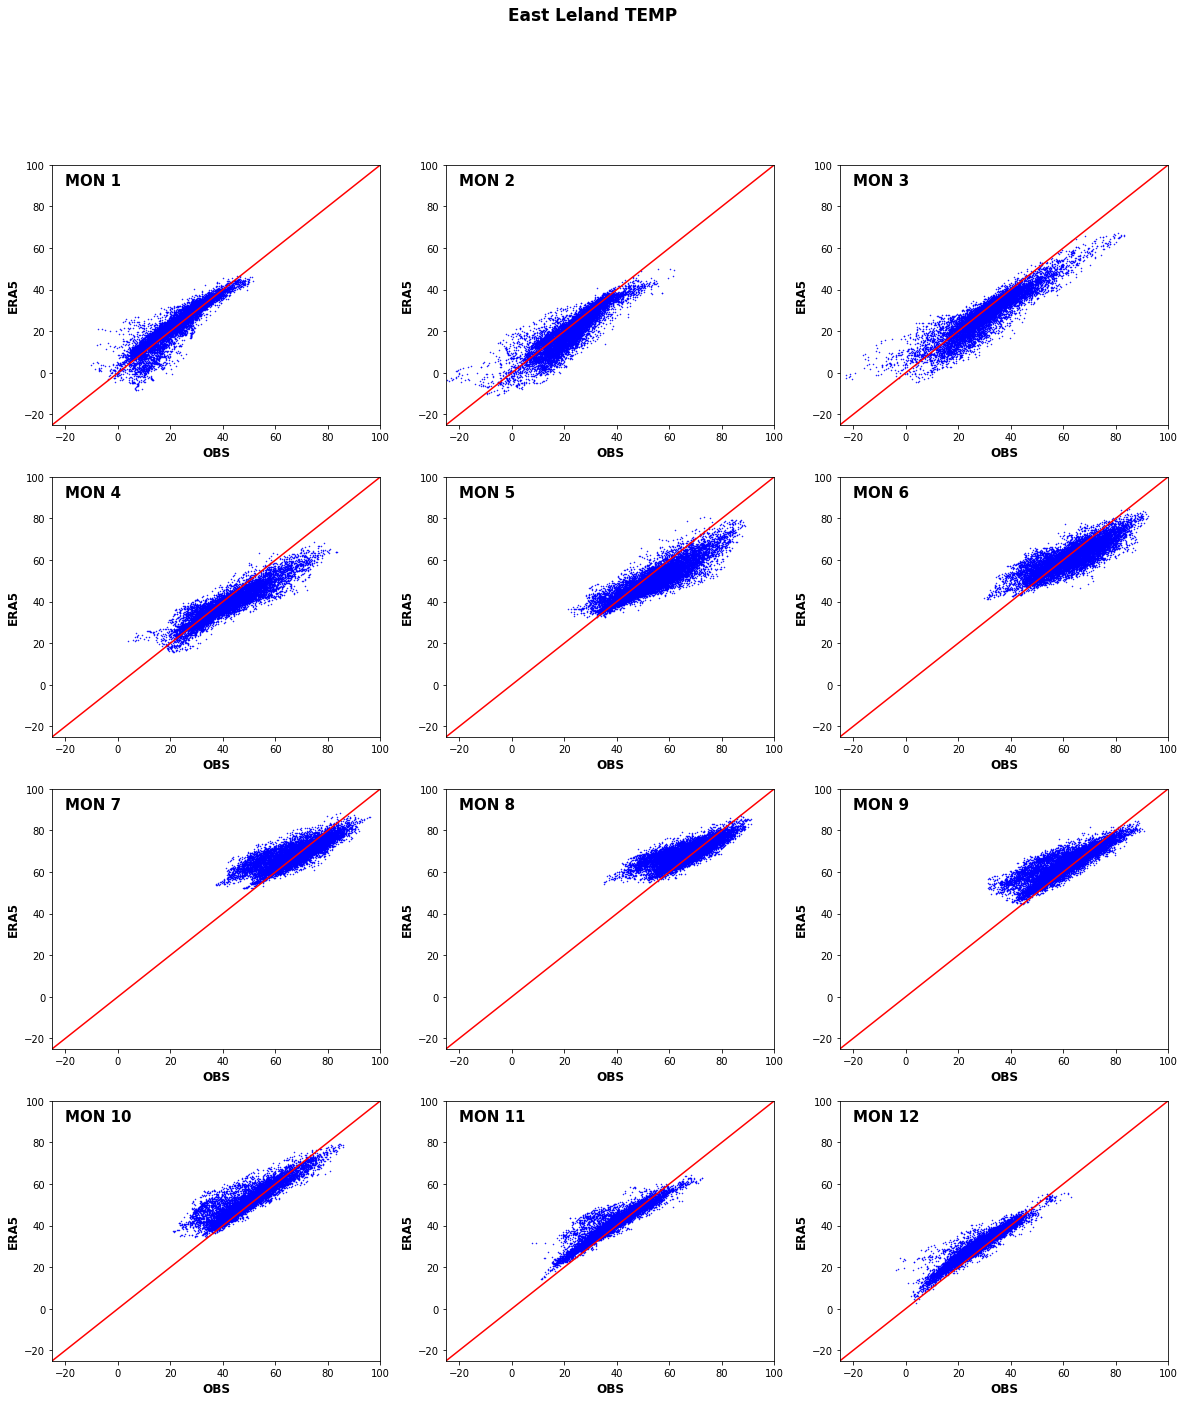

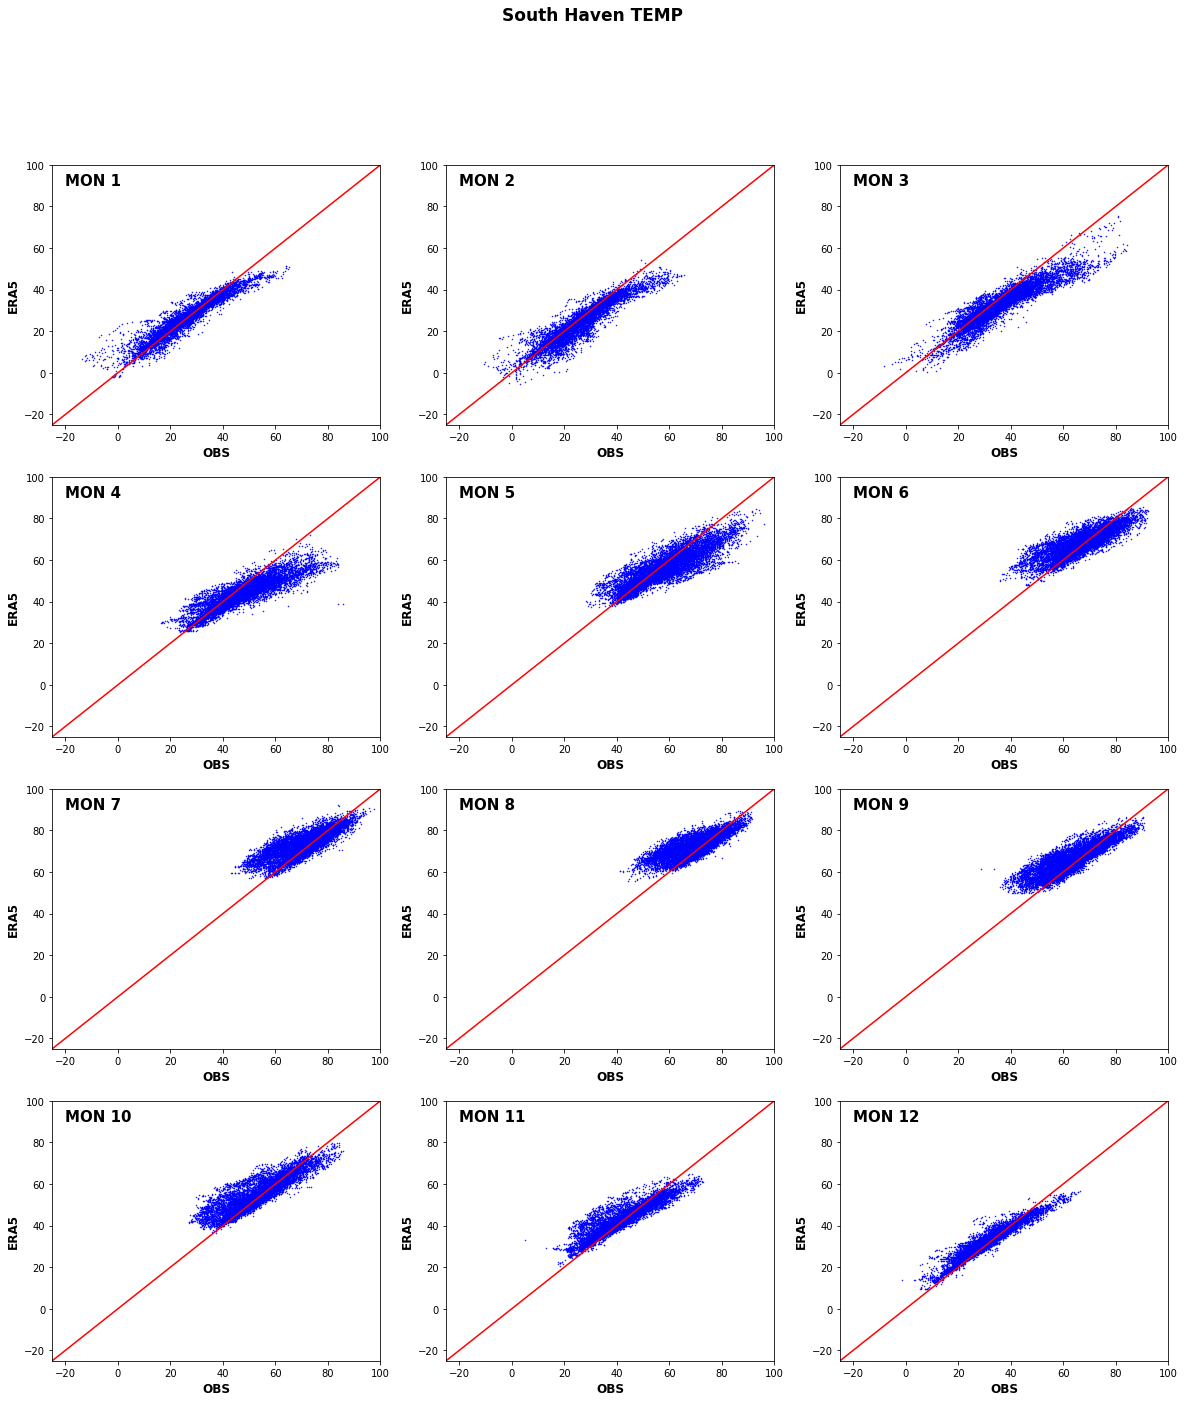

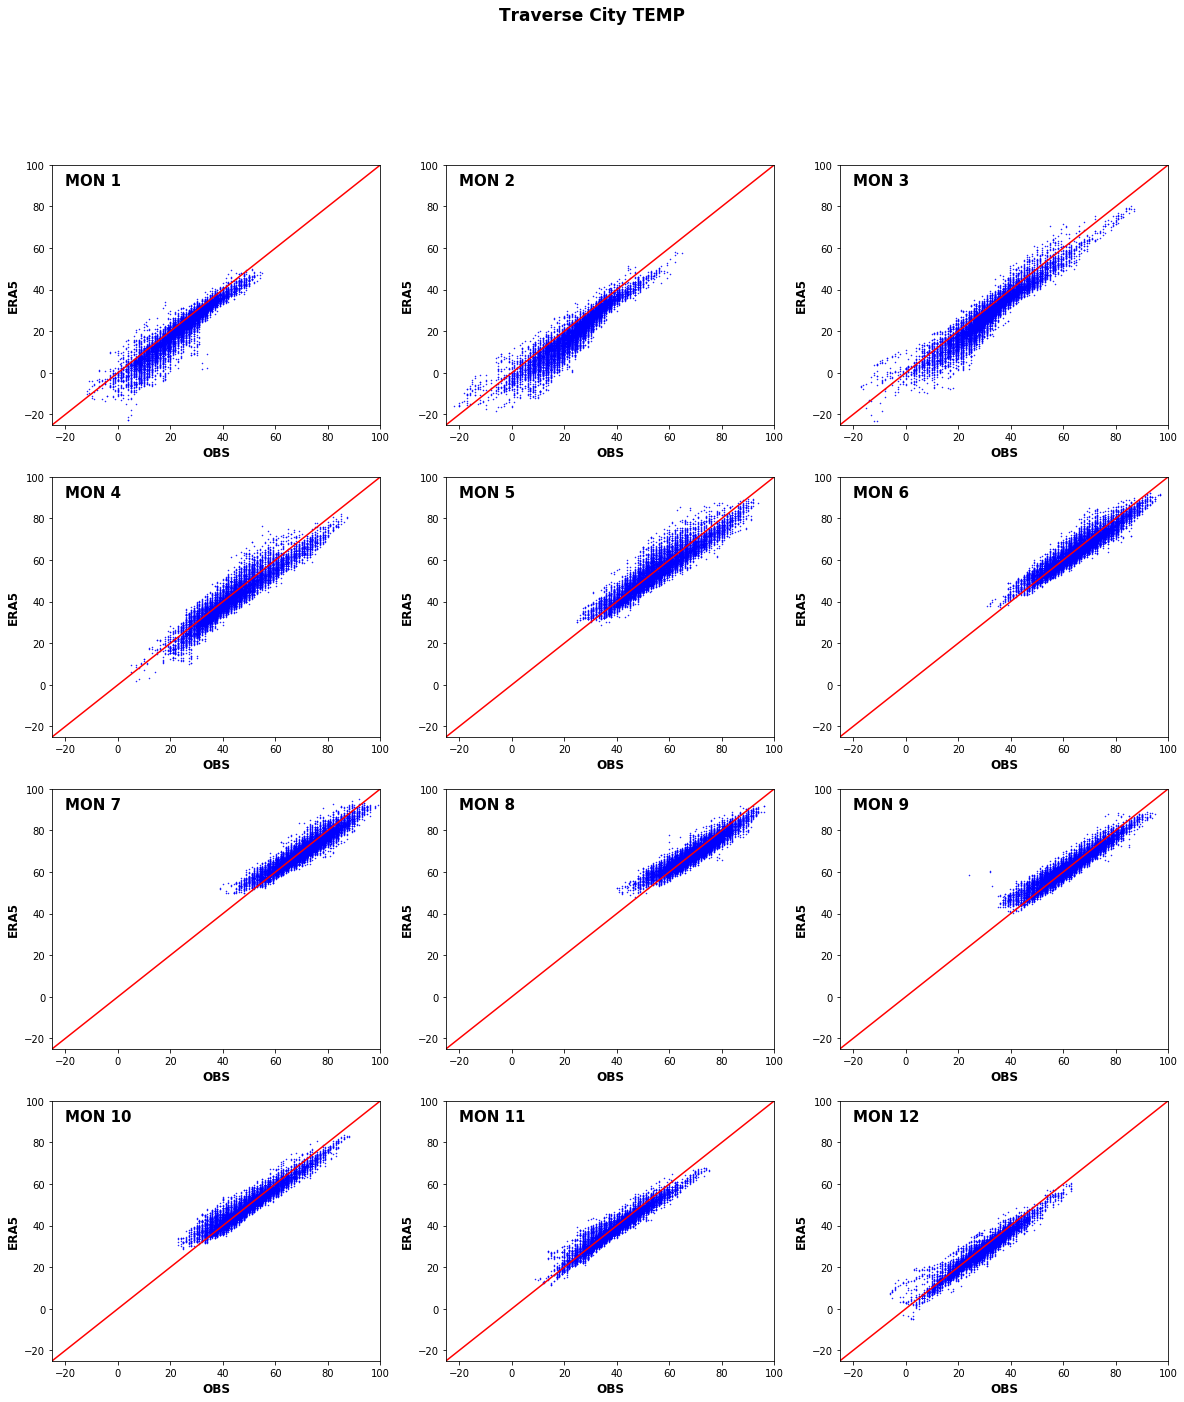

In [140]:
title = ['East Lansing TEMP', 'Gaylord TEMP', 'Grand Rapids TEMP','East Leland TEMP', 'South Haven TEMP', 'Traverse City TEMP' ]
for k in range(6):
    plt.subplots(4, 3, figsize=(20, 22))
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.plot(obs_data[i+k*12], era_data[i+k*12], 'bo', ms=.5)
    #     plt.title(title[i],  fontsize = 13, fontweight='bold')
        plt.ylabel('ERA5',  fontsize = 12, fontweight='bold')
        plt.xlabel('OBS',  fontsize = 12, fontweight='bold')
        plt.xlim(-25,100)
        plt.ylim(-25,100)
        plt.plot(ax.get_xlim(), ax.get_ylim(), 'r')
        plt.text(-20,90,'MON '+str(i+1),fontsize = 15, fontweight='bold')
    plt.suptitle(title[k],fontsize = 17, fontweight='bold')
    plt.savefig('./plot/Summary/{0}bymonth.png'.format(title[k]))

In [2]:
df_el = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df_gl = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df_gr = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
df_ele = pd.read_csv('./observation/East Leland 5 min.csv')
df_sh = pd.read_csv('./observation/South Haven 5 min_crc.csv')
df_tvc = pd.read_csv('observation/ASOS Traverse City_crc_1.csv')

In [3]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].min()
t_daymin_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].min()
t_daymin_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].min()

In [60]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']

In [83]:
days_count = []
yrs = [18, 11, 15, 12, 18, 18]
t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]
st = [0, 104, 244, 270, 0, 0]
for k in range(6):
    days = np.zeros(yrs[k])
    dates = st[k]
    for i in range(yrs[k]):
        if (2019-18+i) % 4:
            days[i] = np.where(np.array(t_daymin_obs[k])[(90+dates):(152+dates)] <= 32.0, 1, 0).sum()
            dates = dates + 365
        else:
            days[i] = np.where(np.array(t_daymin_obs[k])[(91+dates):(153+dates)] <= 32.0, 1, 0).sum()
            dates = dates + 366
        
    days_count.append(days)

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


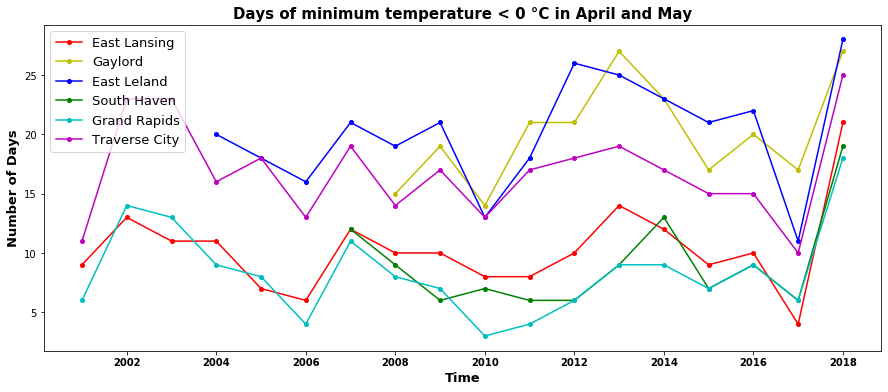

In [99]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(18-yrs[0], 18)), days_count[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(18-yrs[1], 18)), days_count[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(18-yrs[2], 18)), days_count[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(18-yrs[3], 18)), days_count[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(18-yrs[4], 18)), days_count[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(18-yrs[5], 18)), days_count[5], 'm-o', lw=1.5, ms=4)

plt.xticks(np.arange(1, 18, step=2), [f'{2001+i}' for i in range(1, 19, 2)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Number of Days', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('Days of minimum temperature < 0 \u00b0C in April and May', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/freezing_Days_count.png')